In [1]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Loading

In [3]:
df=pd.read_csv("/content/drive/MyDrive/inportant/Learning/ML/ExploratoryDataAnalysis(EDA)/CaseStudy/Dataset/loan.csv")

#Data Lookup

In [7]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [8]:
pd.set_option('display.max_rows', 200)

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

# Data Cleaning

##Null value checks in the data frame

### Column wise Check

In [10]:
print(df.isnull().sum())

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


Drop the columns which does not have any data

In [11]:
colsSeries= df.isnull().sum()
colsSeries = colsSeries[colsSeries == 39717]
print(len(list(colsSeries.index)))
columnsToBeDropped=list(colsSeries.index) #total 54 columns to be dropped

54


In [12]:
df.drop(columnsToBeDropped, axis=1, inplace=True)

Checking out other columns and missing values

In [13]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Still  mths_since_last_delinq, mths_since_last_record, next_pymnt_d has high number of missing values. We can drop this columns as it will not help us in our analysis.

Remaining column 54

In [14]:
df1= df.drop(['mths_since_last_record','next_pymnt_d','mths_since_last_delinq'], axis=1)

Remove the extra columns which are not required at all and has unique values.

Ex: id, member_id, url

Remaining column 51

In [15]:
df2= df1.drop(['id','member_id','url'], axis=1)

Remove the columns which have one unique value (We can mark it as constant) so we can remove these columns.

In [16]:
uniqueValuesOfColumns=  df2.nunique()
singleValueColumns= uniqueValuesOfColumns[uniqueValuesOfColumns==1]
df3= df2.drop(list(singleValueColumns.index),axis=1)

In [17]:
len(list(df3.columns))

42

Now the column length is **42**

### Row wise null check


In [18]:

rowsNullValueMap= df3.isnull().sum(axis=1)
rowsNullValueMap=rowsNullValueMap[rowsNullValueMap>5] #Checking if any rows having more than 5 null values
rowsNullValueMap

df4=df3

There are no rows having null values


##Derive columns if possible

A new attribute to define the ratio of loan to income

In [19]:
df4['loanToIncomeRatio'] = round((df4['loan_amnt']/ df4['annual_inc'])*100,2)
df4.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade                 emp_title emp_length  ... total_rec_prncp  \
0     B        B2                       NaN  10+ years  ...         5000.00   
1     C        C4                     Ryder   < 1 year  ...          456.46   
2     C        C5                       NaN  10+ years  ...         2400.00   
3     C        C1       AIR RESOURCES BOARD  10+ years  ...        10000.00   
4     B        B5  University Medical Group     1 year  ...         2475.94   

   total_rec_int total_rec_late_fee recoveries collection_recovery_fee  \
0         863.16               0.00       0.00                    0.00   
1         435.17               0.00     117.08                    1.11   
2         605.67               0.00       0.00                    0.00   
3        2214.92              16.97       0.00                    0.00   
4        1037.39               0.00       0.00                    0.00   

  last_pymnt_d last_pymnt_amnt last_credit_pull_d pub_rec_bankruptcies  \
0       Jan-15          171.62             May-16                  0.0   
1       Apr-13          119.66             Sep-13                  0.0   
2       Jun-14          649.91             May-16                  0.0   
3       Jan-15          357.48             Apr-16                  0.0   
4       May-16           67.79             May-16                  0.0   

  loanToIncomeRatio  
0             20.83  
1              8.33  
2             19.59  
3             20.33  
4              3.75  

[5 rows x 43 columns]

Derive numeric columns from loan status for correlation analysis later

In [59]:
loan_status=pd.get_dummies(df4['loan_status'],dtype='int')
loan_status

Charged Off  Current  Fully Paid
0                0        0           1
1                1        0           0
2                0        0           1
3                0        0           1
4                0        1           0
...            ...      ...         ...
39712            0        0           1
39713            0        0           1
39714            0        0           1
39715            0        0           1
39716            0        0           1

[39717 rows x 3 columns]

In [60]:
df4=pd.concat([df4,loan_status], axis=1)
df4.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   
3      10000        10000          10000.0   36 months     13.49       339.31   
4       3000         3000           3000.0   60 months     12.69        67.79   

  grade sub_grade                 emp_title  emp_length  ... recoveries  \
0     B        B2                       NaN         1.0  ...       0.00   
1     C        C4                     Ryder         0.0  ...     117.08   
2     C        C5                       NaN         1.0  ...       0.00   
3     C        C1       AIR RESOURCES BOARD         1.0  ...       0.00   
4     B        B5  University Medical Group         0.1  ...       0.00   

   collection_recovery_fee last_pymnt_d last_pymnt_amnt last_credit_pull_d  \
0                     0.00       Jan-15          171.62             May-16   
1                     1.11       Apr-13          119.66             Sep-13   
2                     0.00       Jun-14          649.91             May-16   
3                     0.00       Jan-15          357.48             Apr-16   
4                     0.00       May-16           67.79             May-16   

  pub_rec_bankruptcies loanToIncomeRatio Charged Off  Current Fully Paid  
0                  0.0             20.83           0        0          1  
1                  0.0              8.33           1        0          0  
2                  0.0             19.59           0        0          1  
3                  0.0             20.33           0        0          1  
4                  0.0              3.75           0        1          0  

[5 rows x 46 columns]

##Standardize and populate missing values


Currently there are few columns which are having missing value

1. emp_title
1. emp_length
1. desc
1. revol_util
1. last_pymnt_d
1. last_credit_pull_d
1. pub_rec_bankruptcies

Below columns can be standardized
1. annual_inc - convert values in thousands
1. int_rate - remove the percentage andconvert it to numeric
1. zip_code - remove the X values and convert it to numeric


###Working on **emp_length**

Missing values will be substituted with mean value and column will be converted to numeric column


Fetching numeric values from current object values

In [61]:
import re
df4['emp_length']=df4['emp_length'].apply(lambda x: '0' if((pd.notnull(x)) & (str(x)[0:1]=='<')) else re.sub("[^0-9]","",str(x)))


Change the column from object to numeric

In [62]:
df4['emp_length'] = pd.to_numeric(df4['emp_length'], errors='coerce')
df4['emp_length']=df4['emp_length']/10

Substitute missing values

In [63]:
df4['emp_length'].fillna(df4['emp_length'].median(), inplace = True)


### Working on **revol_util**

Convert the column to numeric and update missing values

In [64]:
df4['revol_util']=df4['revol_util'].apply(lambda x: str(x)[:-1])

In [65]:
df4['revol_util'] = pd.to_numeric(df4['revol_util'], errors='coerce')

In [66]:
df4['revol_util'].describe()

count    39717.000000
mean        48.394972
std         28.293277
min          0.000000
25%         25.000000
50%         49.000000
75%         72.000000
max         99.000000
Name: revol_util, dtype: float64

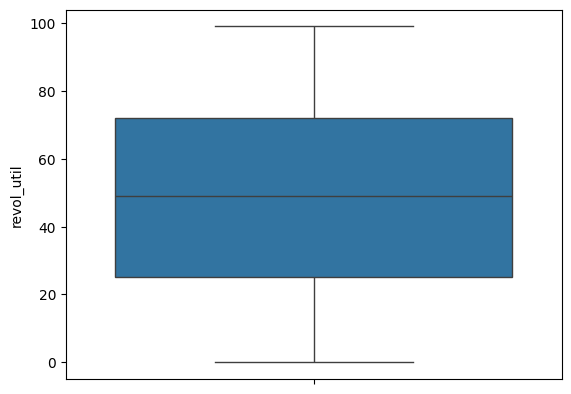

In [67]:
sns.boxplot(df4['revol_util'])
plt.show()

According to the data and plot shown above mean and median almost provides same value. We can substitute any of these as data is properly distributed.

In [68]:
df4['revol_util'].fillna(df4['revol_util'].median(), inplace = True)

### Working on **pub_rec_bankruptcies**

Populate the missing value.

In [69]:
df4.pub_rec_bankruptcies.info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: pub_rec_bankruptcies
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


<Axes: ylabel='pub_rec_bankruptcies'>

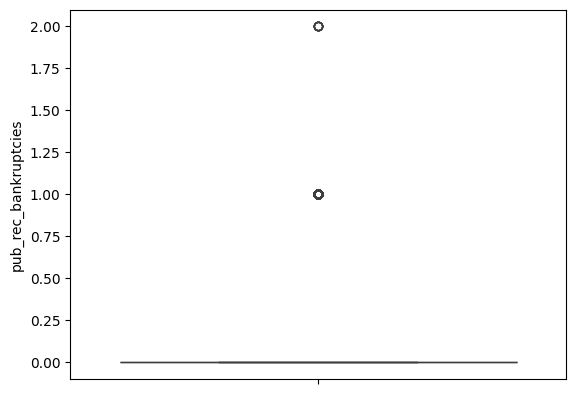

In [70]:
sns.boxplot(df4.pub_rec_bankruptcies)

In [71]:
df4.pub_rec_bankruptcies.describe()

count    39717.000000
mean         0.042501
std          0.202603
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

According to the graph and data analysis, we can mark na values as median value(0).

In [72]:
df4['pub_rec_bankruptcies'].fillna(df4['pub_rec_bankruptcies'].median(), inplace = True)

In [73]:
df4.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12942
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
out_prncp_

###Working on **annual_inc**

In [74]:
df4['annual_inc']=df4['annual_inc'].apply(lambda x: x/1000)

###Working on **int_rate**

In [75]:
df4['int_rate']=df4['int_rate'].apply(lambda x: str(x)[:-1])
df4['int_rate'] = pd.to_numeric(df4['int_rate'], errors='coerce')
df4.int_rate.describe()

count    39717.000000
mean        11.935710
std          3.740208
min          5.400000
25%          9.200000
50%         11.800000
75%         14.500000
max         24.500000
Name: int_rate, dtype: float64

###Working on **zip_code**

In [76]:
df4['zip_code']=df4['zip_code'].apply(lambda x: str(x)[:-2])
df4['zip_code'] = pd.to_numeric(df4['zip_code'], errors='coerce')
# df4['zip_code'] =  df4['zip_code'].astype('int')

print (df4[['zip_code']])

       zip_code
0           8.0
1           3.0
2           6.0
3           9.0
4           9.0
...         ...
39712       8.0
39713       2.0
39714       NaN
39715       2.0
39716       NaN

[39717 rows x 1 columns]


###Ignored column
We can ignore the below columns as these are not required that much for our analysis.

1. emp_title
1. title
1. last_pymnt_d
1. last_credit_pull_d
1. desc


In [77]:
df5= df4.drop(['emp_title','title','last_pymnt_d','last_credit_pull_d','desc'],axis=1)

In [78]:
df5.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                   4374
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

###Remove duplicates if Any

In [79]:
df5.shape

(39717, 41)

In [80]:
df5.drop_duplicates()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           5000         5000           4975.0   36 months      10.6   
1           2500         2500           2500.0   60 months      15.2   
2           2400         2400           2400.0   36 months      15.9   
3          10000        10000          10000.0   36 months      13.4   
4           3000         3000           3000.0   60 months      12.6   
...          ...          ...              ...         ...       ...   
39712       2500         2500           1075.0   36 months       8.0   
39713       8500         8500            875.0   36 months      10.2   
39714       5000         5000           1325.0   36 months       8.0   
39715       5000         5000            650.0   36 months       7.4   
39716       7500         7500            800.0   36 months      13.7   

       installment grade sub_grade  emp_length home_ownership  ...  \
0           162.87     B        B2         1.0           RENT  ...   
1            59.83     C        C4         0.0           RENT  ...   
2            84.33     C        C5         1.0           RENT  ...   
3           339.31     C        C1         1.0           RENT  ...   
4            67.79     B        B5         0.1           RENT  ...   
...            ...   ...       ...         ...            ...  ...   
39712        78.42     A        A4         0.4       MORTGAGE  ...   
39713       275.38     C        C1         0.3           RENT  ...   
39714       156.84     A        A4         0.0       MORTGAGE  ...   
39715       155.38     A        A2         0.0       MORTGAGE  ...   
39716       255.43     E        E2         0.0            OWN  ...   

       total_rec_int total_rec_late_fee recoveries collection_recovery_fee  \
0             863.16               0.00       0.00                    0.00   
1             435.17               0.00     117.08                    1.11   
2             605.67               0.00       0.00                    0.00   
3            2214.92              16.97       0.00                    0.00   
4            1037.39               0.00       0.00                    0.00   
...              ...                ...        ...                     ...   
39712         322.97               0.00       0.00                    0.00   
39713        1413.49               0.00       0.00                    0.00   
39714         272.16               0.00       0.00                    0.00   
39715         174.20               0.00       0.00                    0.00   
39716        1695.26               0.00       0.00                    0.00   

      last_pymnt_amnt  pub_rec_bankruptcies loanToIncomeRatio  Charged Off  \
0              171.62                   0.0             20.83            0   
1              119.66                   0.0              8.33            1   
2              649.91                   0.0             19.59            0   
3              357.48                   0.0             20.33            0   
4               67.79                   0.0              3.75            0   
...               ...                   ...               ...          ...   
39712           80.90                   0.0              2.27            0   
39713          281.94                   0.0             47.22            0   
39714            0.00                   0.0              5.00            0   
39715            0.00                   0.0              2.50            0   
39716          256.59                   0.0             34.09            0   

       Current Fully Paid  
0            0          1  
1            0          0  
2            0          1  
3            0          1  
4            1          0  
...        ...        ...  
39712        0          1  
39713        0          1  
39714        0          1  
39715        0          1  
39716        0          1  

[39717 rows x 41 columns]

##Remove records which are not required

we are mainly focused on finding out the loans which is already completed (Fully paid or Charged off) so discard the loans which the company is currently processing.

In [81]:
df5 = df5[df5['loan_status']!='Current']

#Categorize the columns

In [82]:
df5.nunique()

loan_amnt                    870
funded_amnt                 1019
funded_amnt_inv             8050
term                           2
int_rate                     165
installment                15022
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5215
verification_status            3
issue_d                       55
loan_status                    2
purpose                       14
zip_code                       9
addr_state                    50
dti                         2853
delinq_2yrs                   11
earliest_cr_line             524
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21275
revol_util                   168
total_acc                     82
out_prncp                      1
out_prncp_inv                  1
total_pymnt                36714
total_pymnt_inv            36387
total_rec_

In [84]:
cat_cols=["term","grade","sub_grade","home_ownership","verification_status","loan_status","purpose"]
num_cols=["loan_amnt","int_rate","installment","emp_length","annual_inc","dti","delinq_2yrs","open_acc","revol_bal","revol_util","total_acc","zip_code","inq_last_6mths","pub_rec","pub_rec_bankruptcies","loanToIncomeRatio","Charged Off"]
extra_cols=["issue_d","earliest_cr_line","funded_amnt","funded_amnt_inv","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_amnt","out_prncp","addr_state"]

len(cat_cols)+len(num_cols)+len(extra_cols)

39

#Univariate Analysis

##Analysis on Numeric columns

Analysis the correlation between the fields

<Axes: >

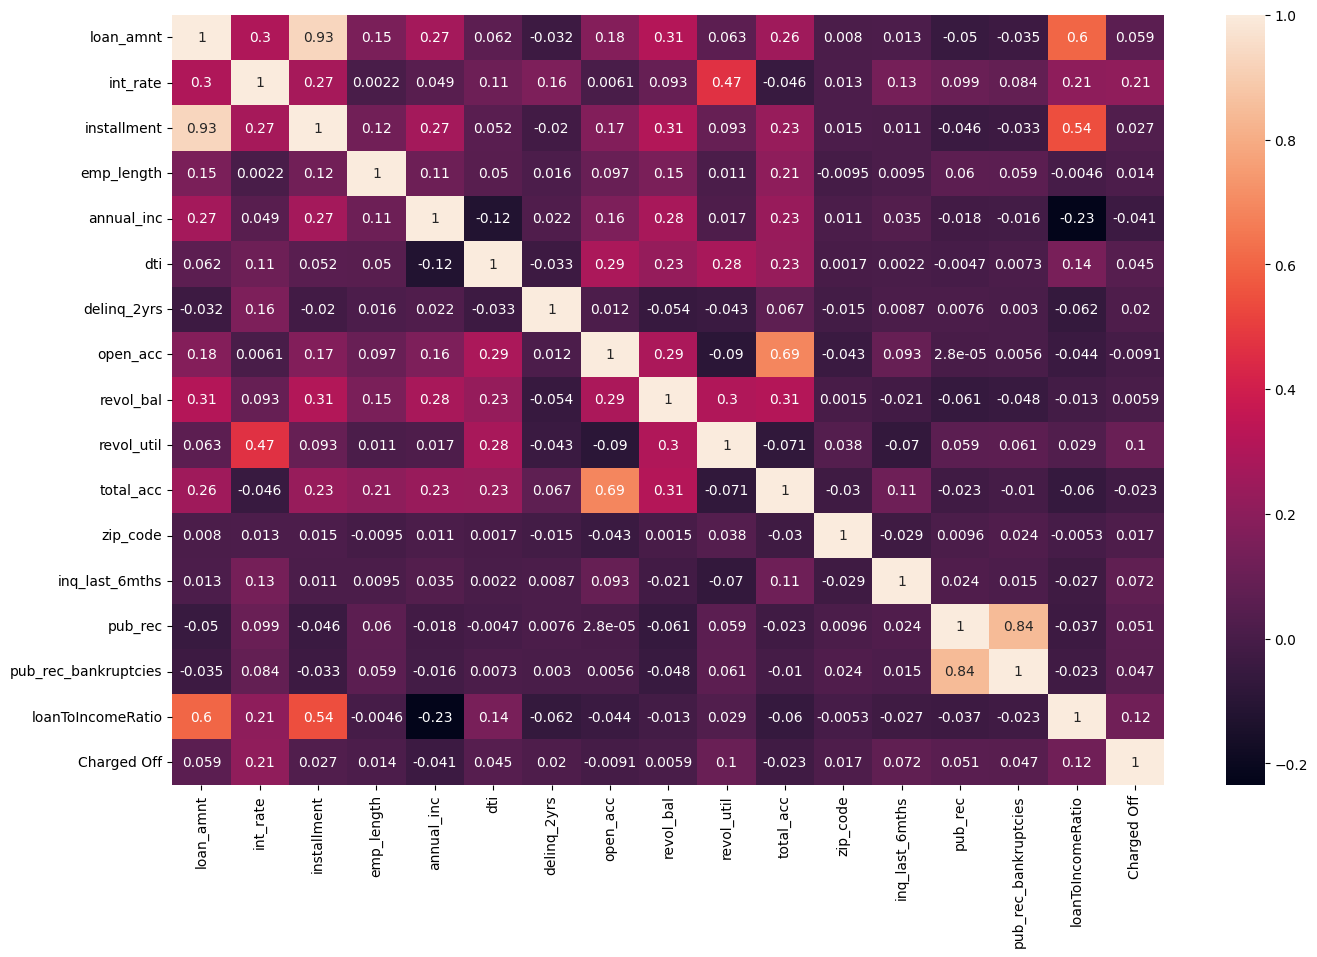

In [85]:
plt.figure(figsize=(16,10))
sns.heatmap(df5[num_cols].corr(), annot=True)

Accoridng to the visualization we can justify that loan status = Charged Off have direct dependency on

1. interest rate: If interest rate increases , there is a chance of loan default/charged off.
2. annual income: Loan status - Charged off have negeative correlation with the annual income. So for less annual income, there is a chang of defaulting.
3. Loan to Income Ratio: If the ration of loan to income is hight, there are chances of default.
4.  Revolving line utilization rate: If revolving line utilization rate is high, there is a chance of loan default.

###Boxplot analysis

Boxplot of loan_amnt


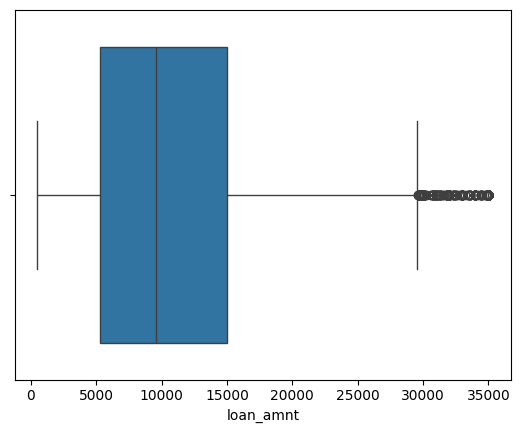

Boxplot of int_rate


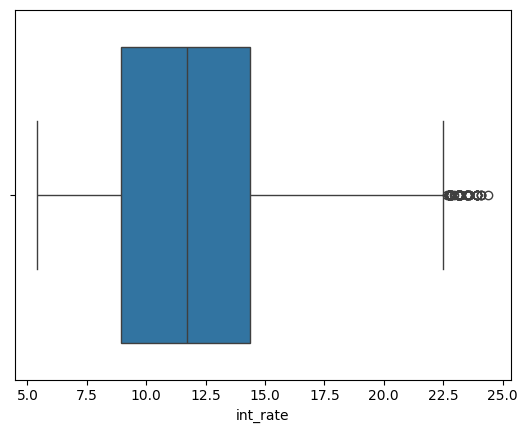

Boxplot of installment


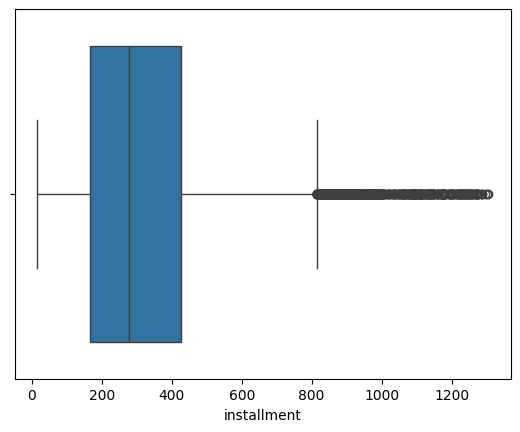

Boxplot of emp_length


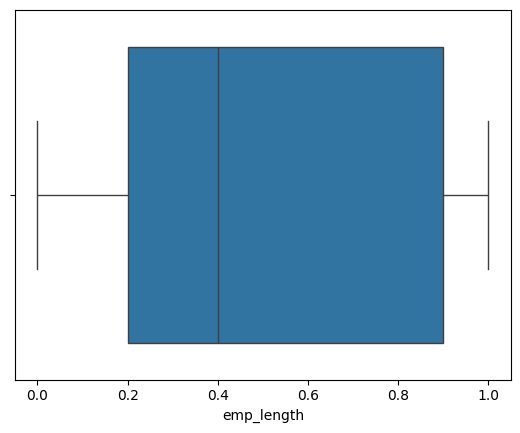

Boxplot of annual_inc


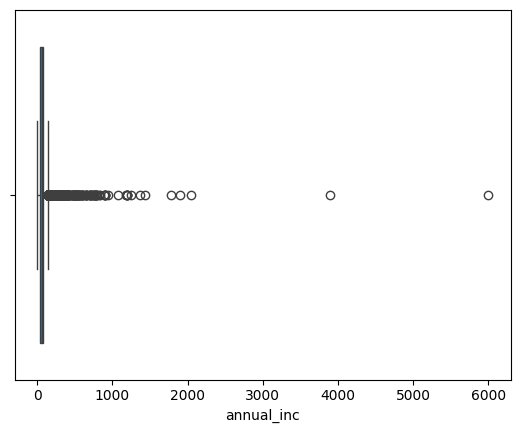

Boxplot of dti


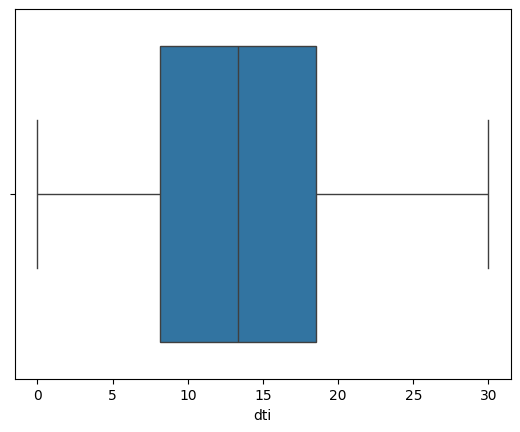

Boxplot of delinq_2yrs


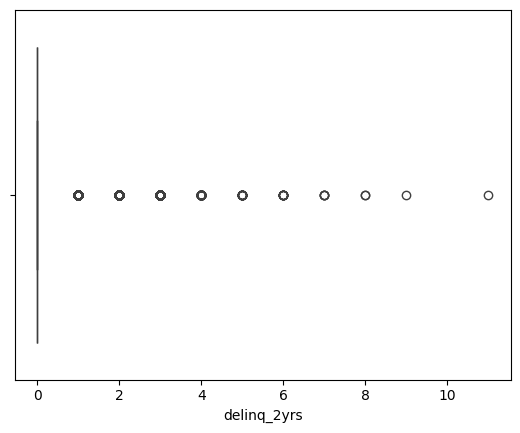

Boxplot of open_acc


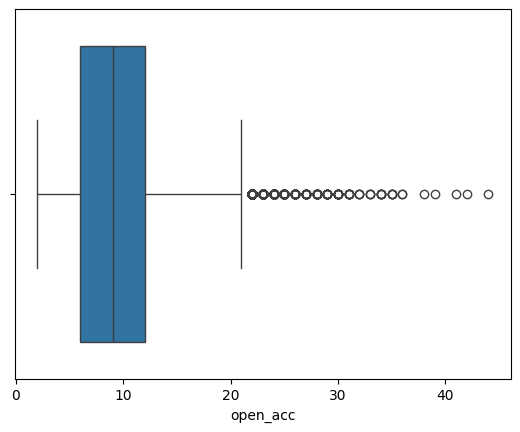

Boxplot of revol_bal


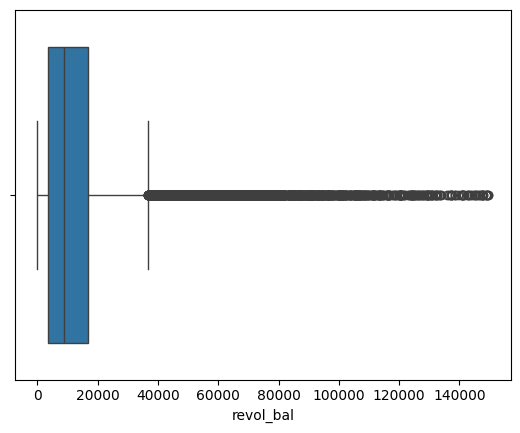

Boxplot of revol_util


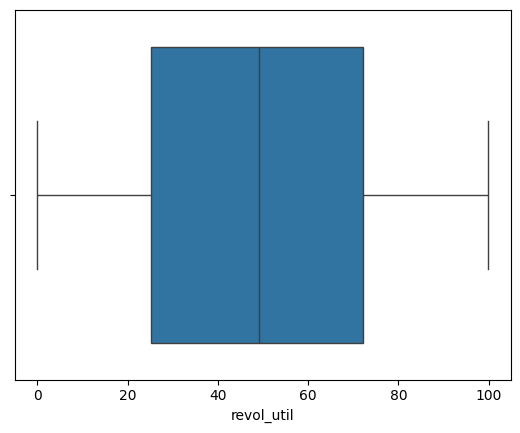

Boxplot of total_acc


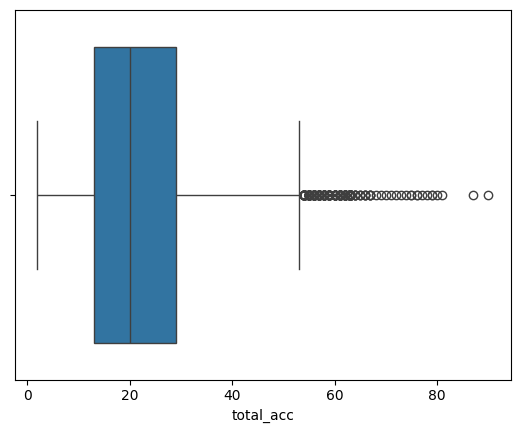

Boxplot of zip_code


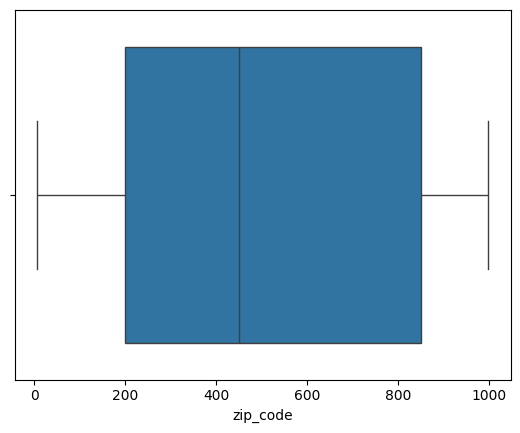

Boxplot of inq_last_6mths


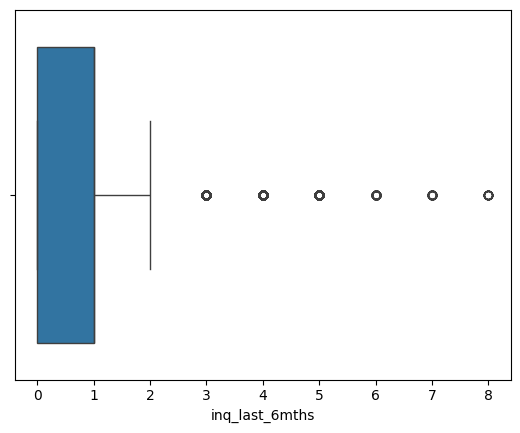

Boxplot of pub_rec


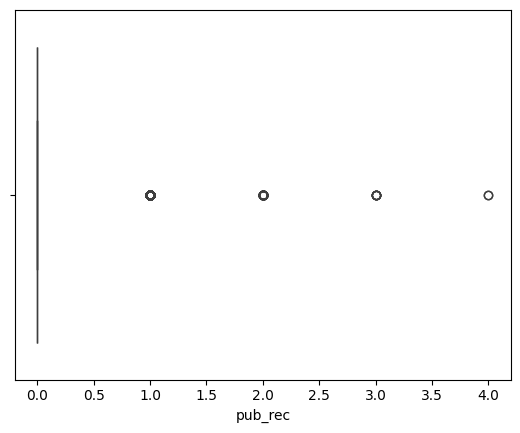

Boxplot of pub_rec_bankruptcies


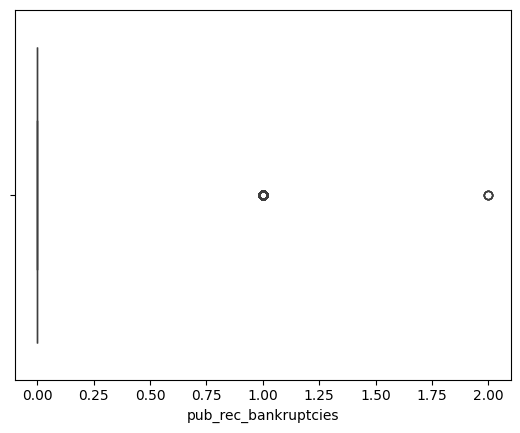

Boxplot of loanToIncomeRatio


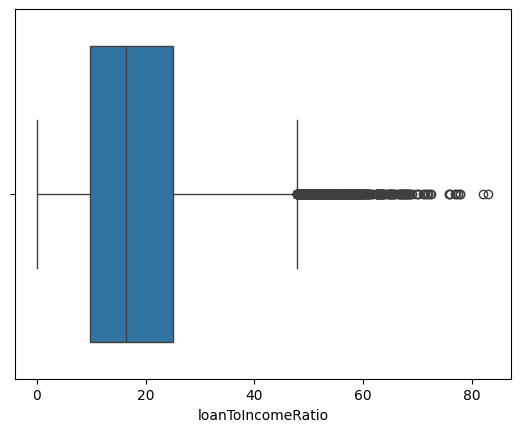

In [48]:

for i in num_cols:
    print("Boxplot of",i)
    sns.boxplot(x=df5[i])

    plt.show()

###Data Cleanup Based on Univariate Analysis

Based on Univariate Analysis we can easily say that
1. anual income income more than 100K is out of box
1. loan amount >26k is out of box
We can remove these records.

####Working on loan_amnt

In [86]:
df5.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [87]:
df6 = df5[df5.loan_amnt<26000]
df6.shape

(37190, 41)

####Working on annual_inc

In [88]:
df6.annual_inc.describe()

count    37190.000000
mean         0.066868
std          0.062942
min          0.004000
25%          0.040000
50%          0.057000
75%          0.080000
max          6.000000
Name: annual_inc, dtype: float64

In [89]:
df7=df6[df6.annual_inc<100]
df7.shape

(37190, 41)

###Boxplot Analysis after data modification


Boxplot of loan_amnt


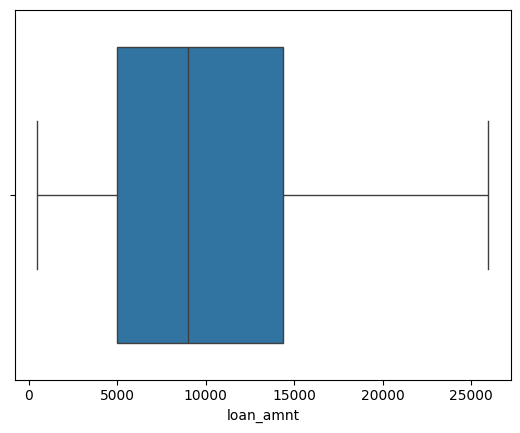

Boxplot of int_rate


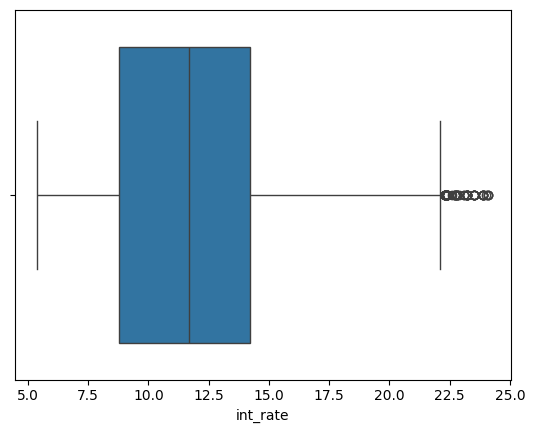

Boxplot of installment


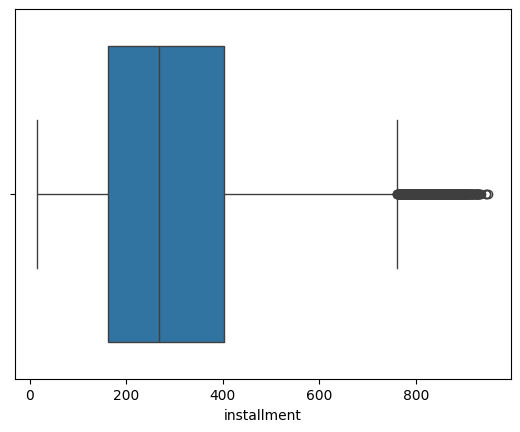

Boxplot of emp_length


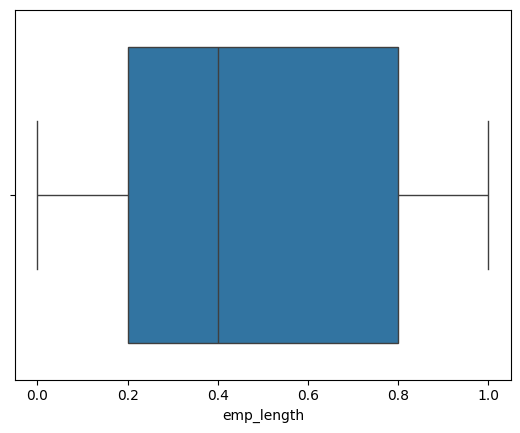

Boxplot of annual_inc


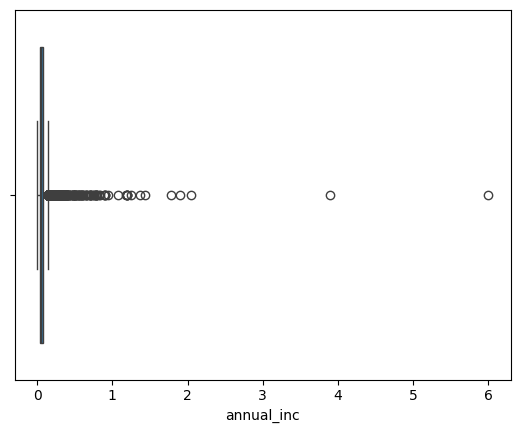

Boxplot of dti


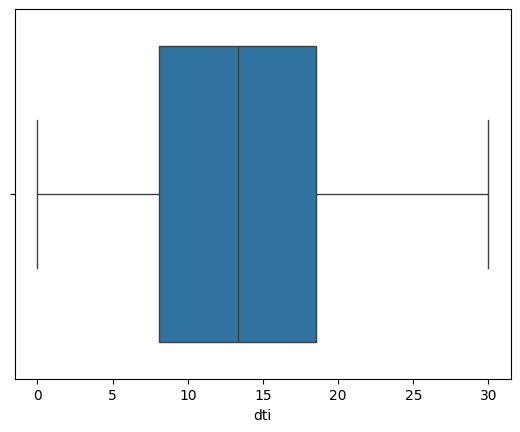

Boxplot of delinq_2yrs


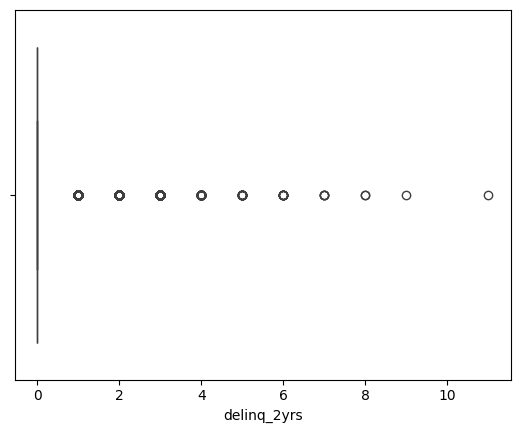

Boxplot of open_acc


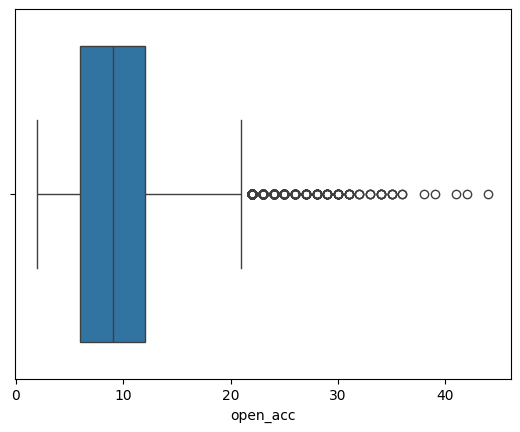

Boxplot of revol_bal


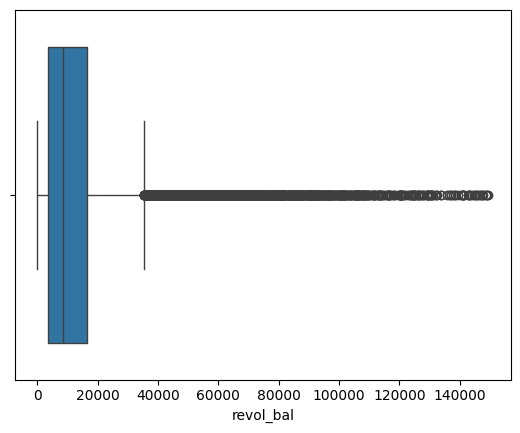

Boxplot of revol_util


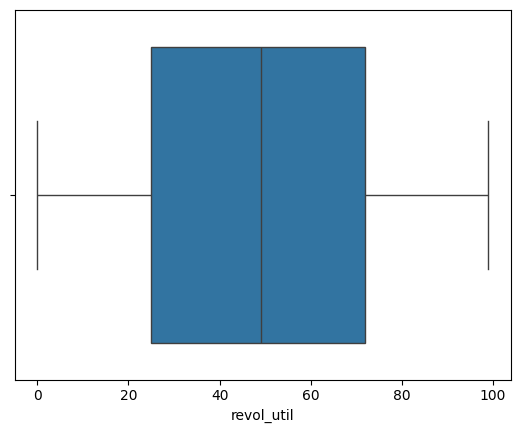

Boxplot of total_acc


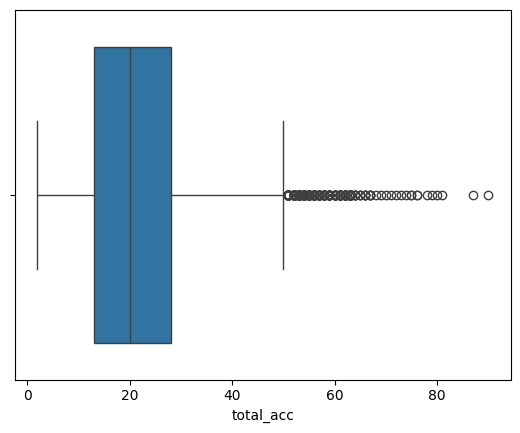

Boxplot of zip_code


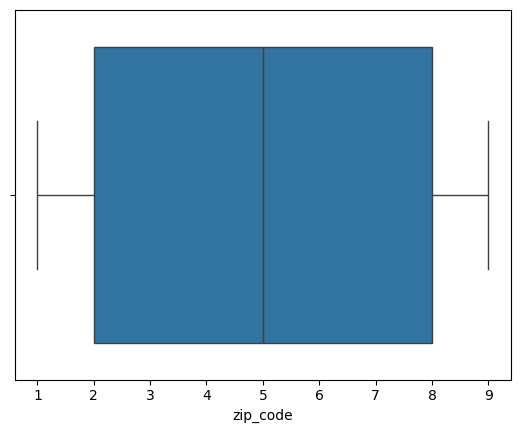

Boxplot of inq_last_6mths


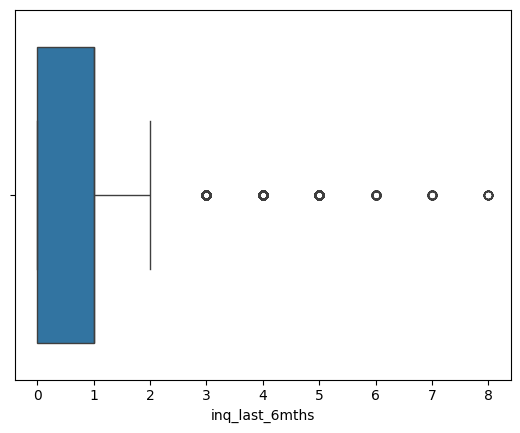

Boxplot of pub_rec


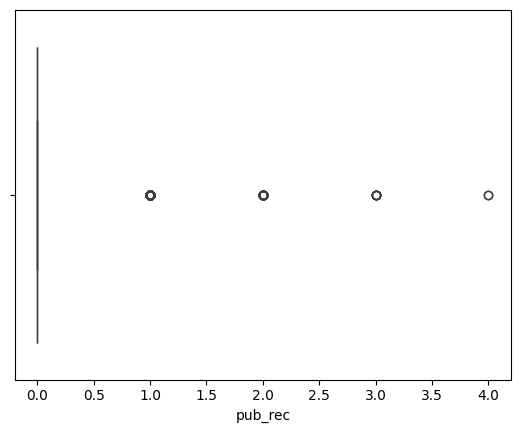

Boxplot of pub_rec_bankruptcies


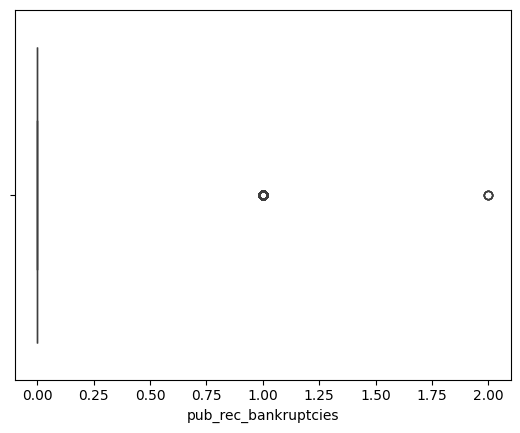

Boxplot of loanToIncomeRatio


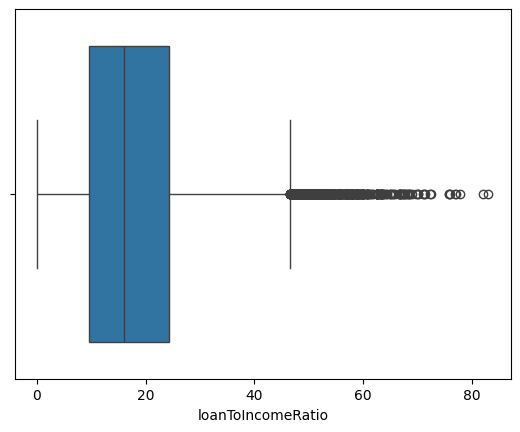

Boxplot of Charged Off


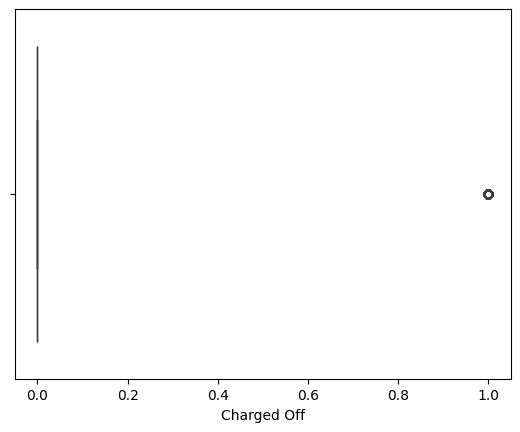

In [90]:
for i in num_cols:
    print("Boxplot of",i)
    sns.boxplot(x=df7[i])
    plt.show()

###Histogram Analysis

histplot of loan_amnt


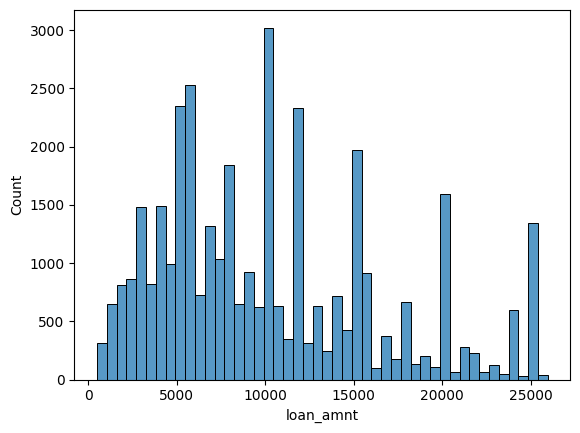

histplot of int_rate


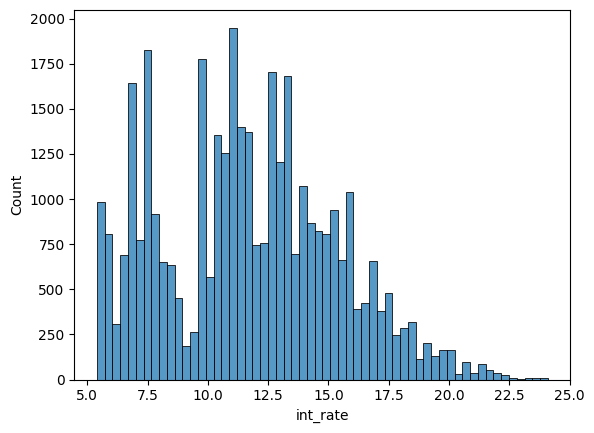

histplot of installment


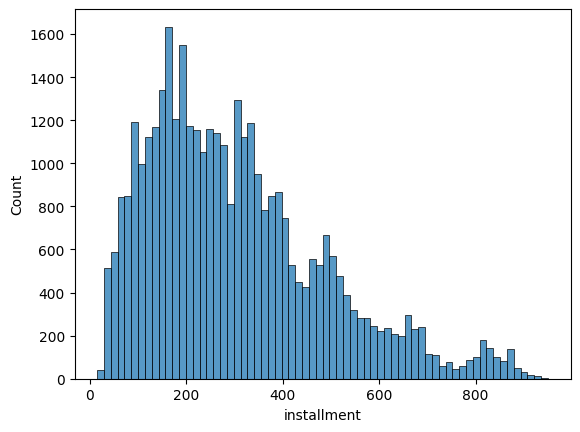

histplot of emp_length


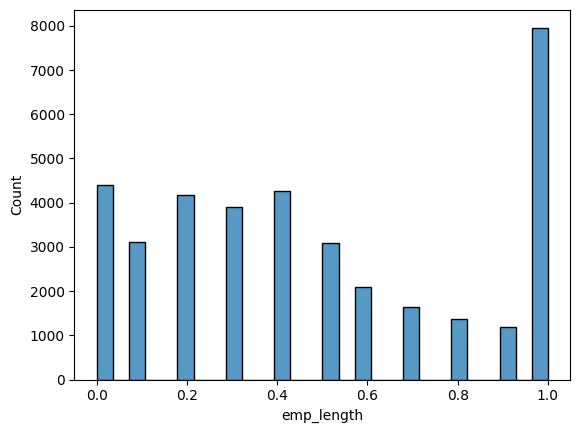

histplot of annual_inc


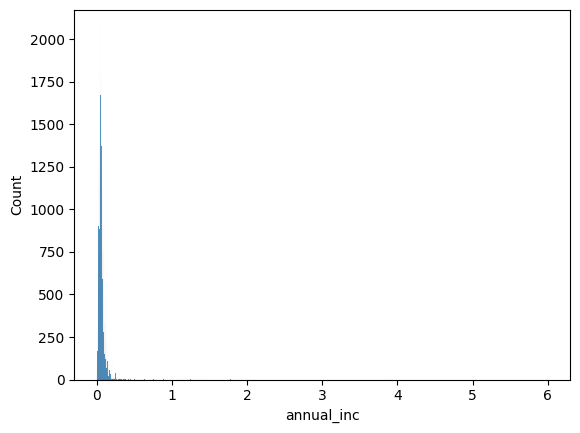

histplot of dti


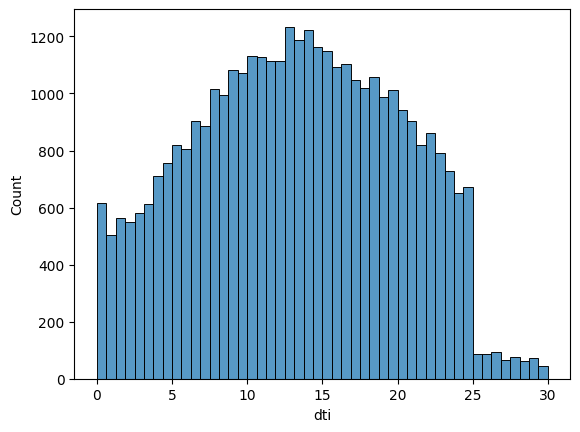

histplot of delinq_2yrs


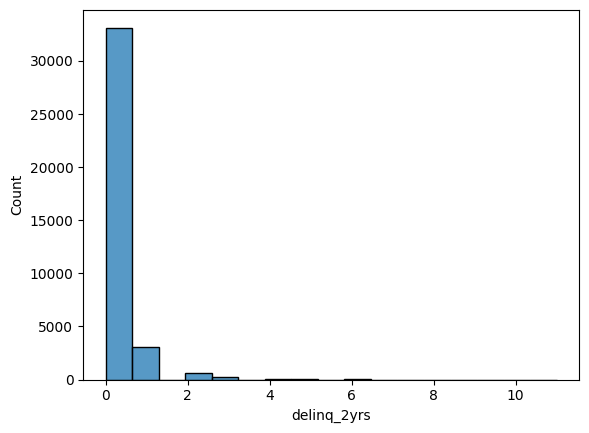

histplot of open_acc


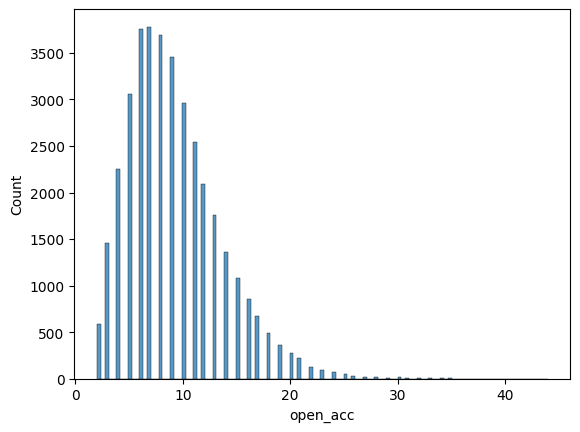

histplot of revol_bal


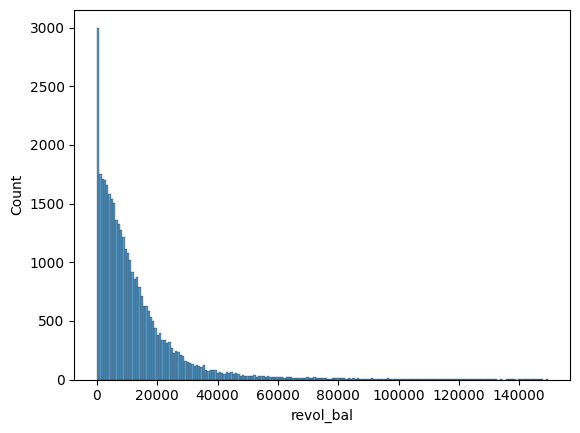

histplot of revol_util


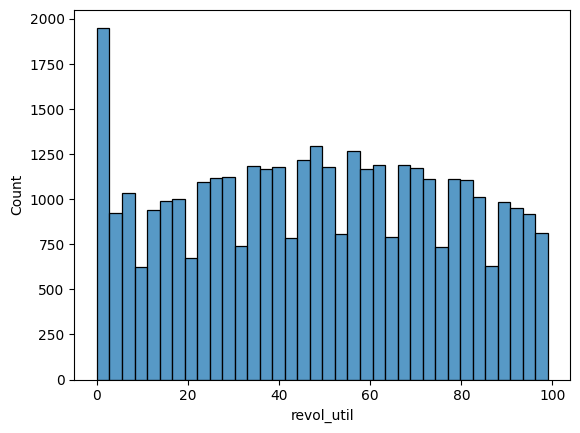

histplot of total_acc


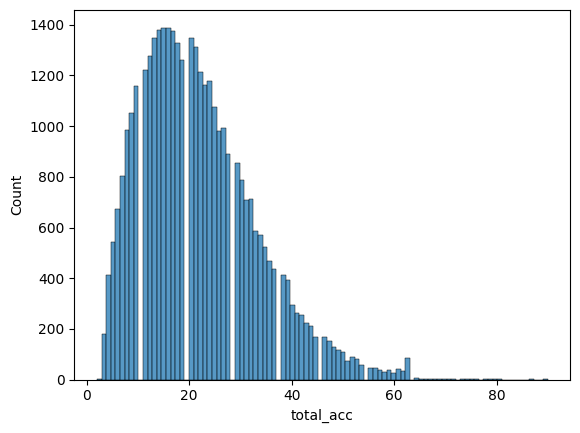

histplot of zip_code


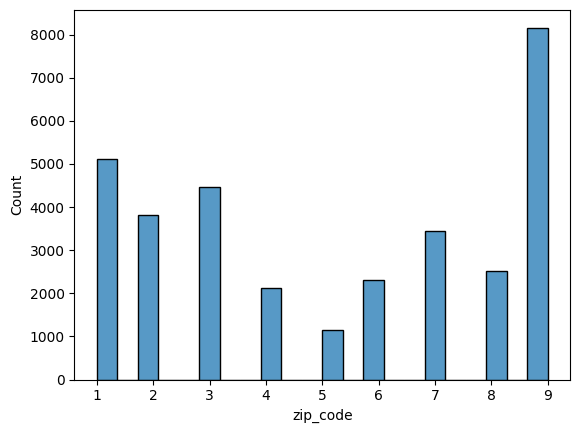

histplot of inq_last_6mths


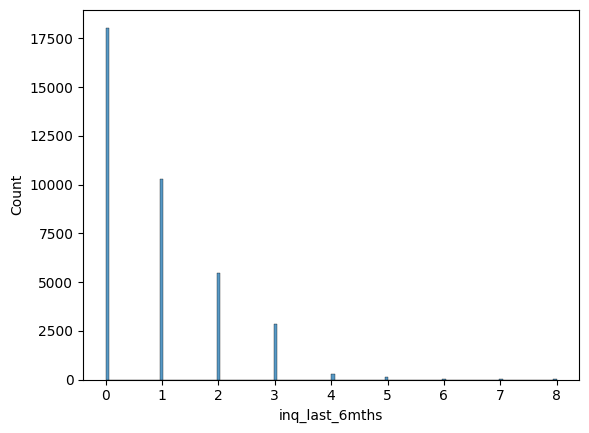

histplot of pub_rec


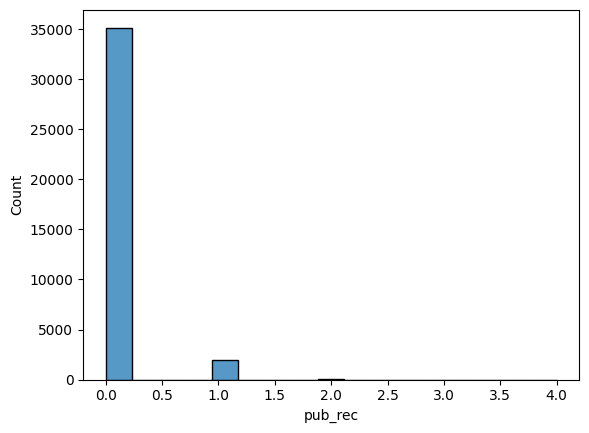

histplot of pub_rec_bankruptcies


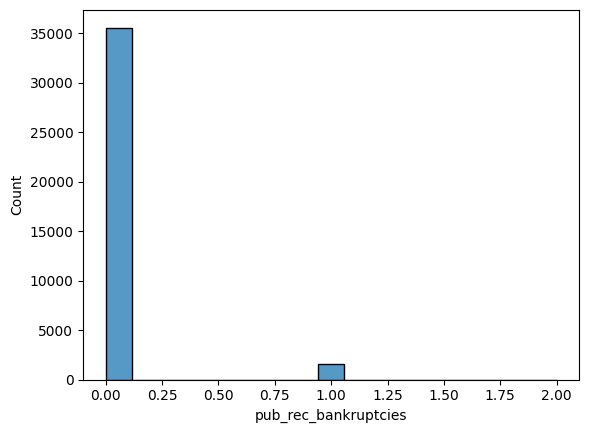

histplot of loanToIncomeRatio


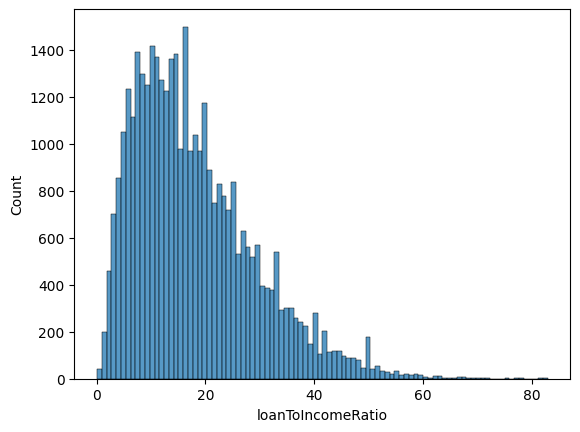

histplot of Charged Off


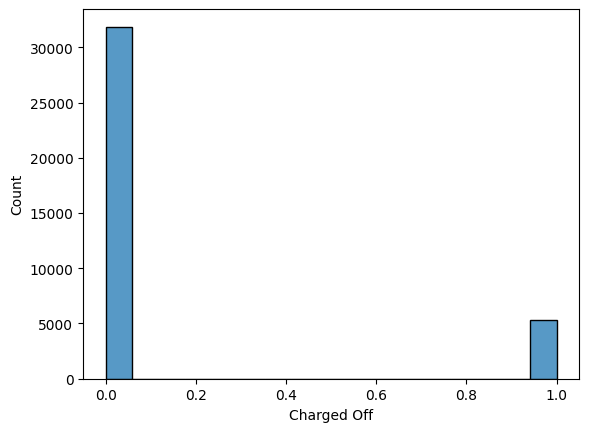

In [91]:
for i in num_cols:
    print("histplot of",i)
    sns.histplot(x=df7[i])
    plt.show()

##Analysis on Categorical columns

###Countplot Analysis

plot for cat col: term


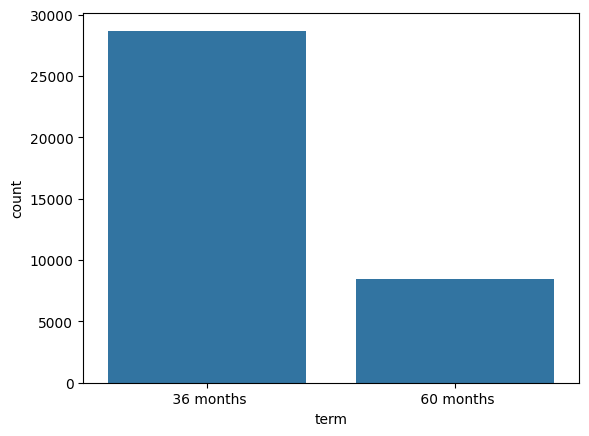

plot for cat col: grade


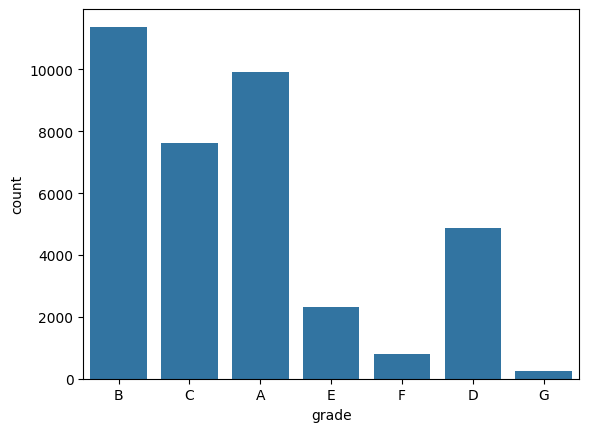

plot for cat col: sub_grade


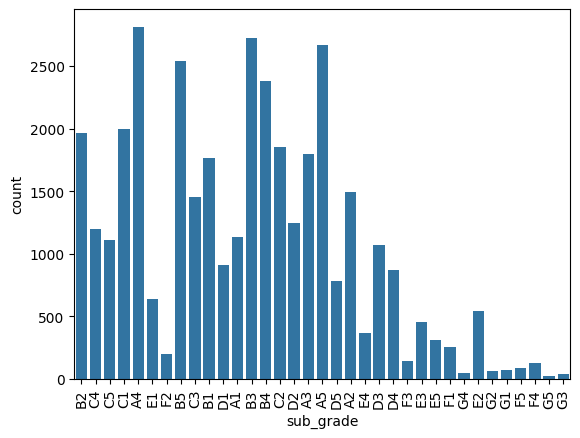

plot for cat col: home_ownership


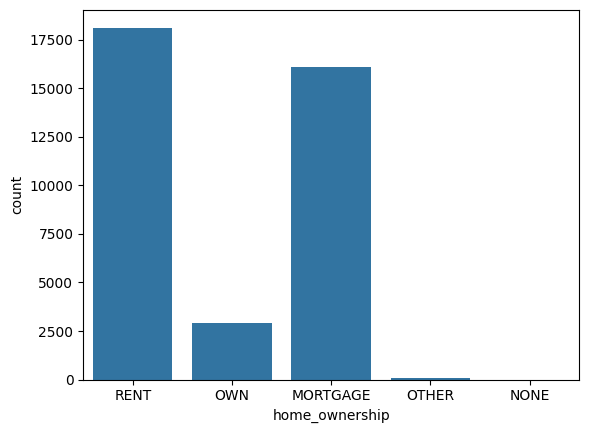

plot for cat col: verification_status


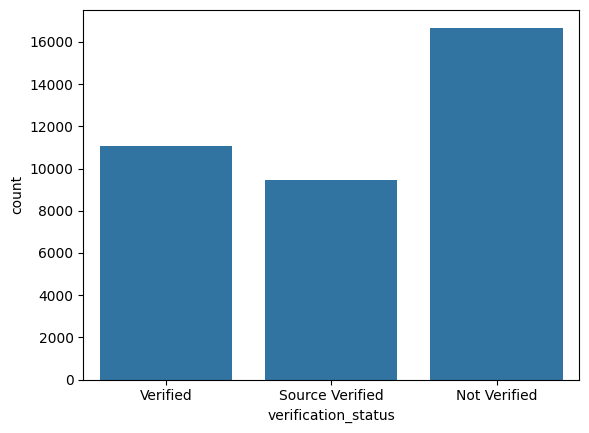

plot for cat col: loan_status


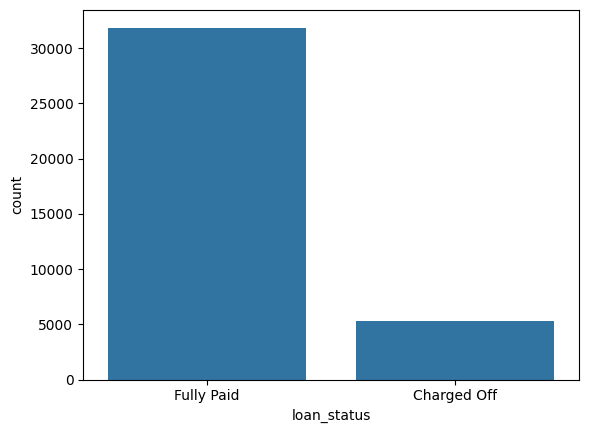

plot for cat col: purpose


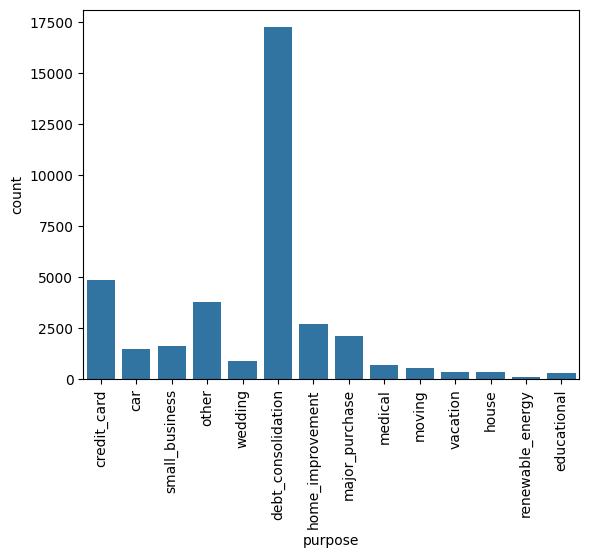

In [92]:
for i in cat_cols:
  print('plot for cat col:',i)
  sns.countplot(x=df7[i])
  if(i in ('purpose','sub_grade')):
    plt.xticks(rotation=90)
  plt.show()

## Univariate Analyis findings

1. Loan Amount:
LC generally disbursed loan amount between 10-10.5K dollars for max number of people.

2. Interest Rate:
People on average got the loan around 12% interest rate.
Highest number of people got at 7.5% interest rate.
3. Installment:
Maximum people are paying installment between 171-185 dollars.
Lot of borrower are paying very high amount of interest rate which is more than 700 dollars.
On average borrower pays 285 dollars on installment.
4. Annual income of Loan Takers:
On average 50% of loan takers are earning 51k dollars.
Highest proportion of borrower who took loan are on salary range of 58 to 60k.
5. DTI:
Average dti is around 13
6. Public record bankruptcies:
Max people do not have public record of bankruptcies.
7. Delinquency in last 2 years:
Very few people have 1-2 delinquency in past 2 years.
Highest 11 delinquencies are visible in dataset for a borrower.
8. Open Accounts:
On average 8 credit lines are open in borrower's credit file.
Maximum borrower are having 3-15 credit lines open
9. Total credit revolving balance:
Maximum borrower have 0 credit revolving balance.
50% borrower have around 7855 credit revolving balance.
10. Revolving line utilization rate
50% borrower have around 48% utilization rate
11. Total Accounts:
On Average every borrower have 20 credit lines in credit file.
12. Inquiries in Last 6 months:
Max borrower did not enquire about it in last 6 months.
13. Number of derogatory public records:
Max people have 0 derogatory public records
14. Loan Term:
Maximum people took 36 months of loan term.
15. Loan Grade:
Maximum loans are disbursed on B grade.
16. Loan Sub Grade:
Maximum loans are disbursed on A4 sub grade.
17. Home Ownership
Maximum borrower are staying on  rented home.
18. Loan Verification Status:
Maximum borrowers are not verified.
19. Purpose of Loan:
Maximum people took loan for debt consolidation.




#Bivariate Analysis

Analysis against loan status.

##Numerical vs Categorical analysis

boxplot of loan status vs loan_amnt


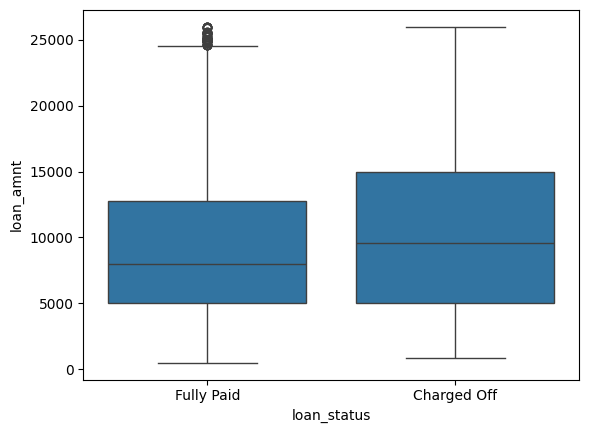

boxplot of loan status vs int_rate


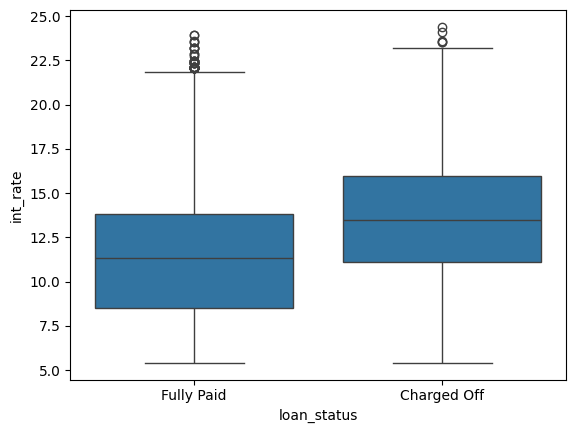

boxplot of loan status vs installment


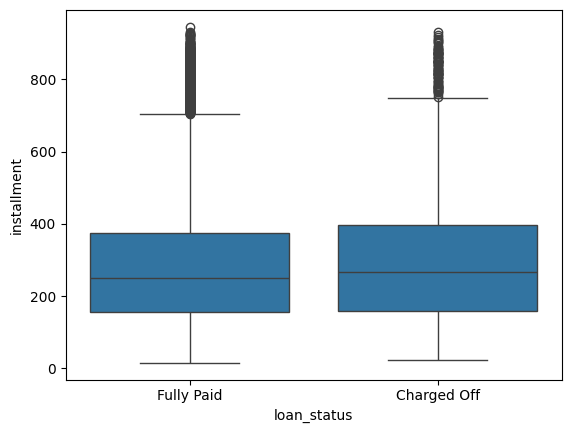

boxplot of loan status vs emp_length


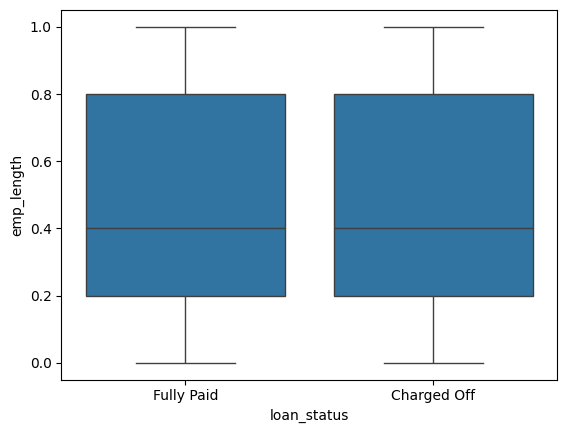

boxplot of loan status vs annual_inc


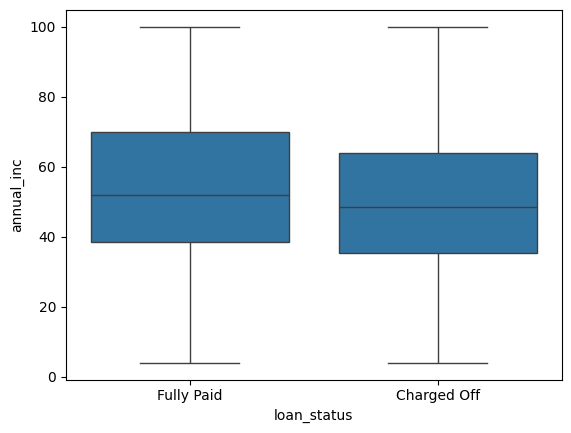

boxplot of loan status vs dti


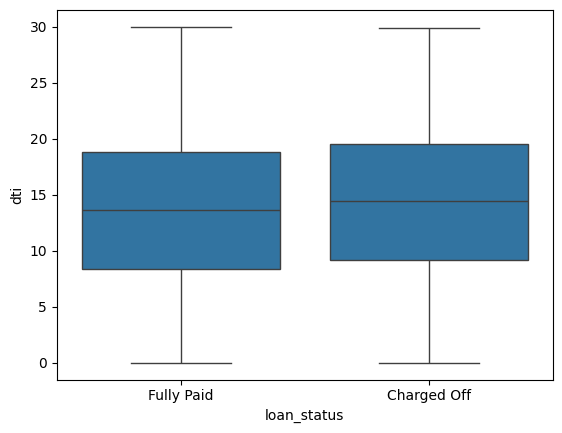

boxplot of loan status vs delinq_2yrs


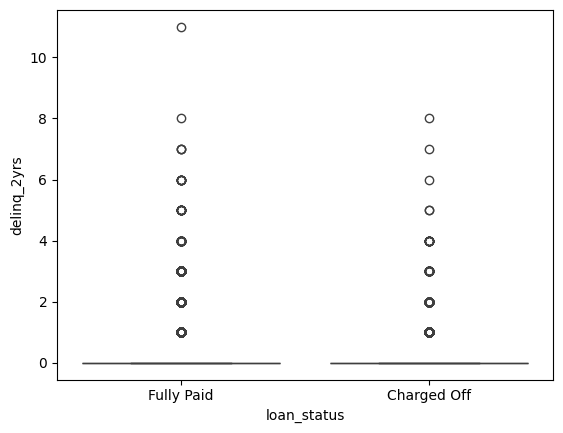

boxplot of loan status vs open_acc


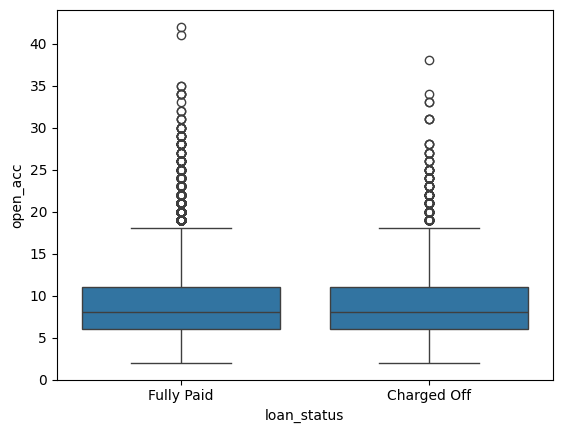

boxplot of loan status vs revol_bal


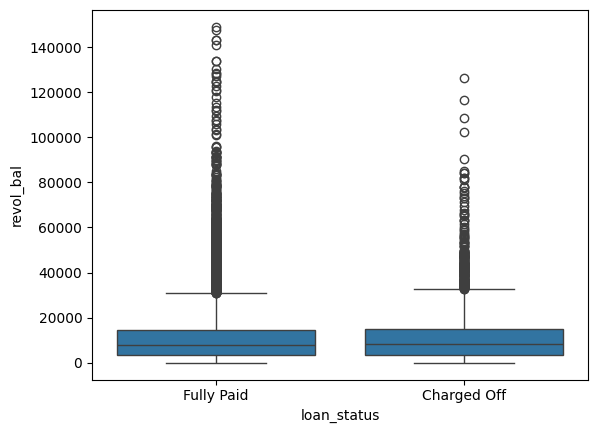

boxplot of loan status vs revol_util


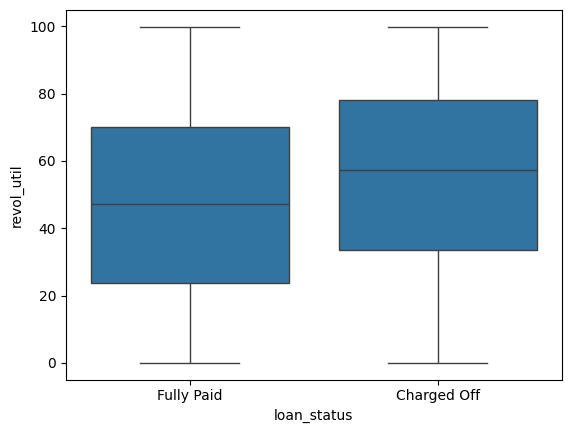

boxplot of loan status vs total_acc


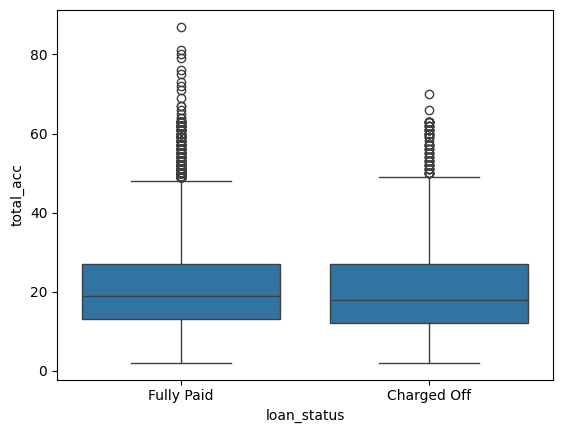

boxplot of loan status vs zip_code


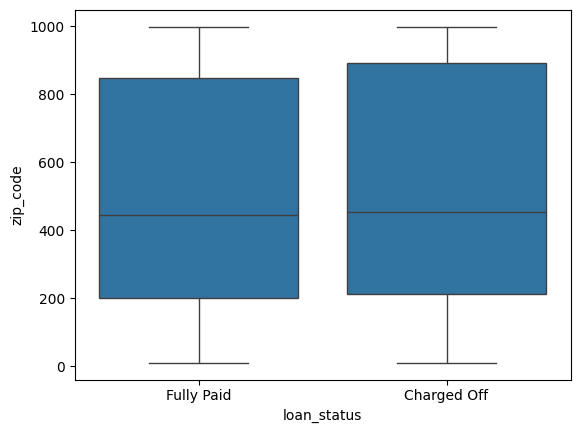

boxplot of loan status vs inq_last_6mths


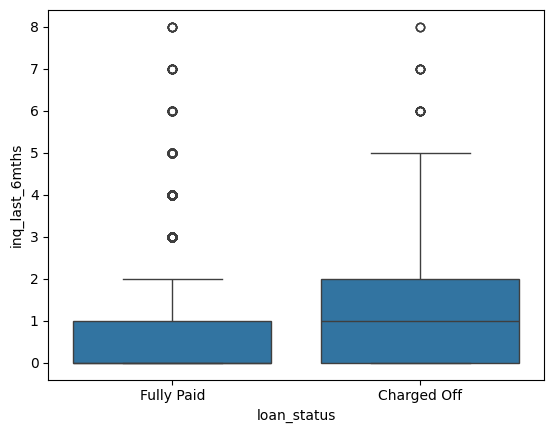

boxplot of loan status vs pub_rec


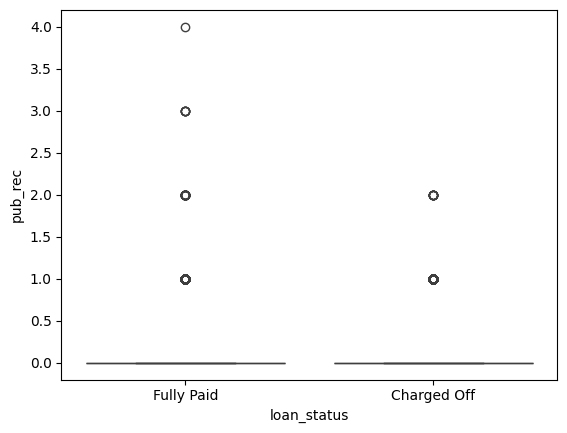

boxplot of loan status vs pub_rec_bankruptcies


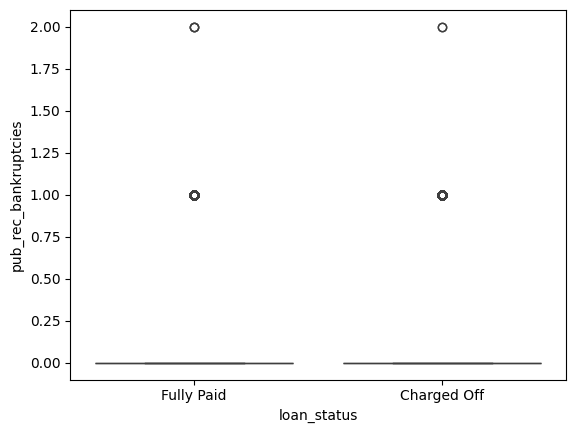

boxplot of loan status vs loanToIncomeRatio


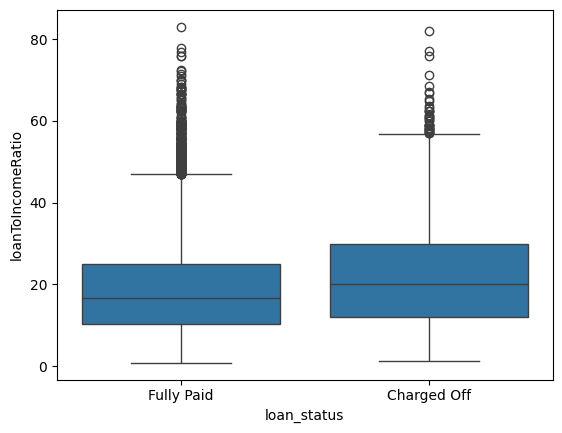

In [57]:
for col1 in num_cols:
  print("boxplot of loan status vs",col1)
  sns.boxplot(x=df7['loan_status'],y=df7[col1])
  plt.show()

###Check if loan satus depends on Zip code or not

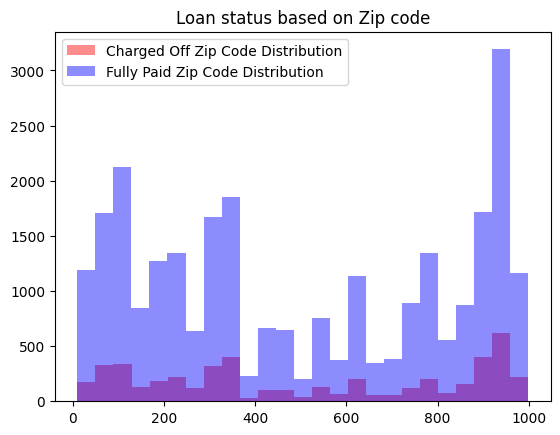

In [ ]:
plt.hist(df7[df7['loan_status']=='Charged Off']['zip_code'], bins=25, alpha=0.45, color='red')
plt.hist(df7[df7['loan_status']=='Fully Paid']['zip_code'], bins=25, alpha=0.45, color='blue')

plt.title("Loan status based on Zip code")

plt.legend(['Charged Off Zip Code Distribution',
            'Fully Paid Zip Code Distribution'])

plt.show()

##Categorical vs Categorical analysis

Relation between categorical columns with loan status

Plotting for  purpose  against loan status


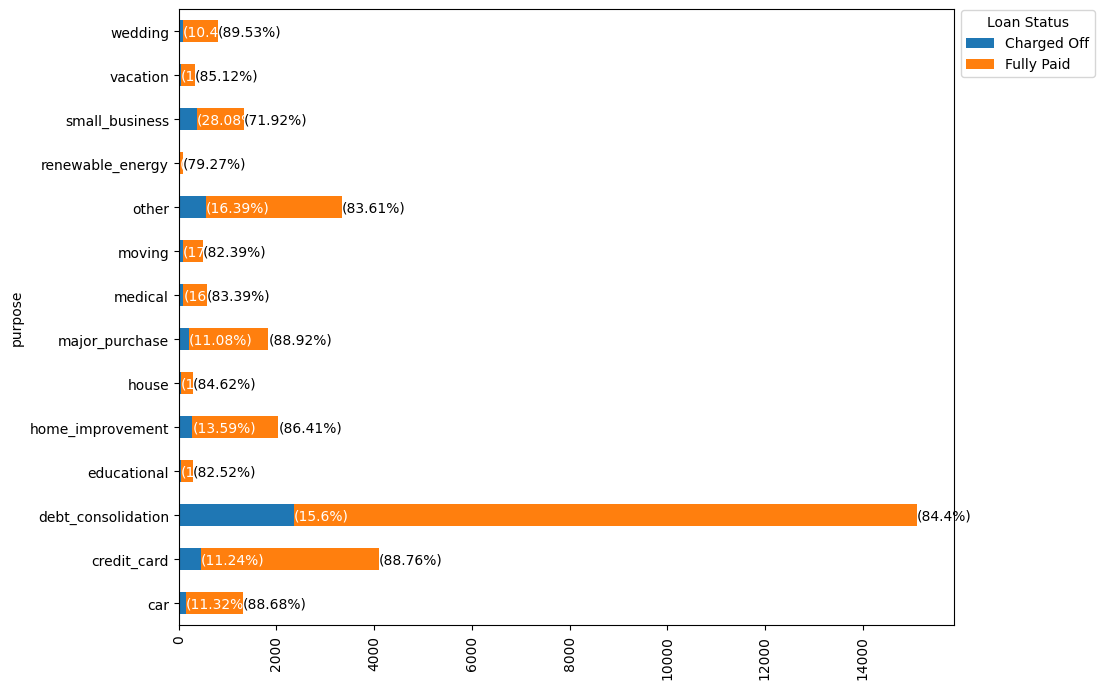

Plotting for  grade  against loan status


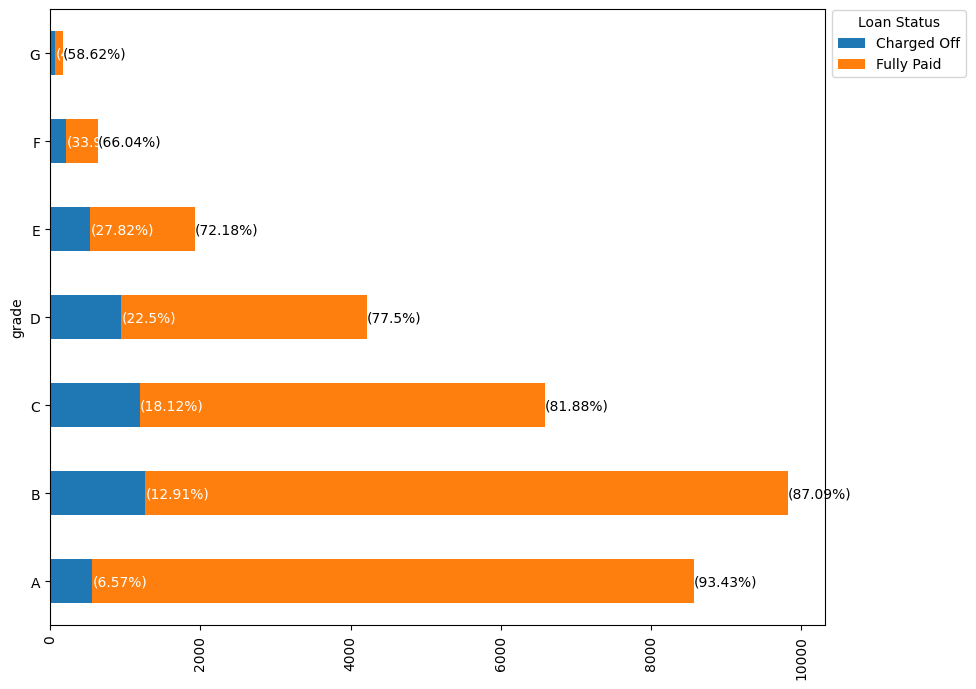

Plotting for  home_ownership  against loan status


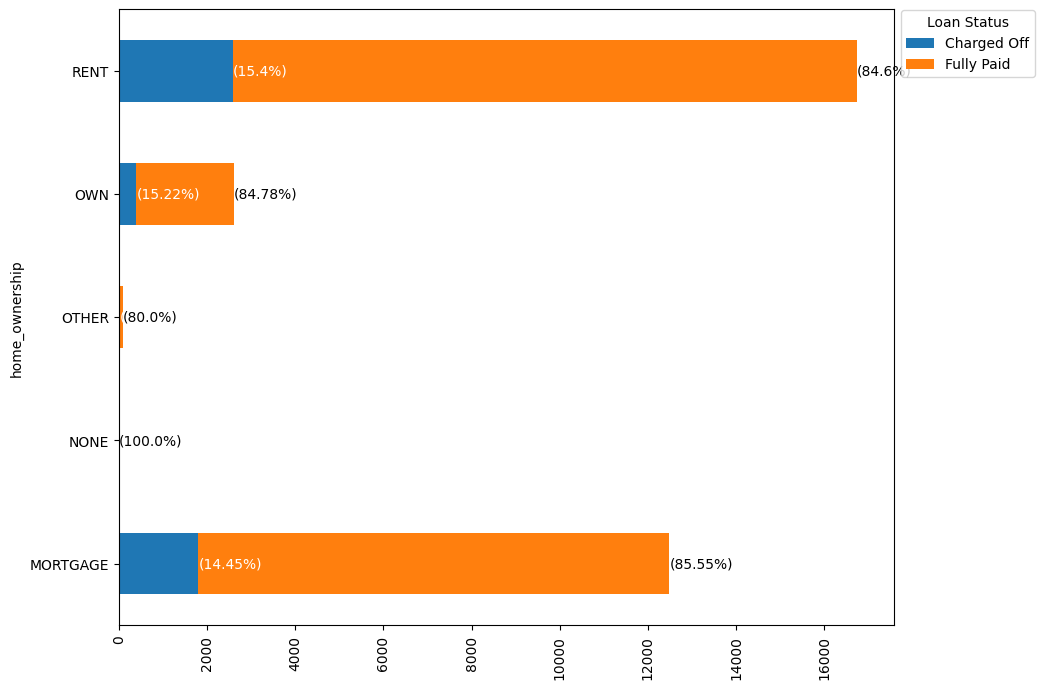

Plotting for  term  against loan status


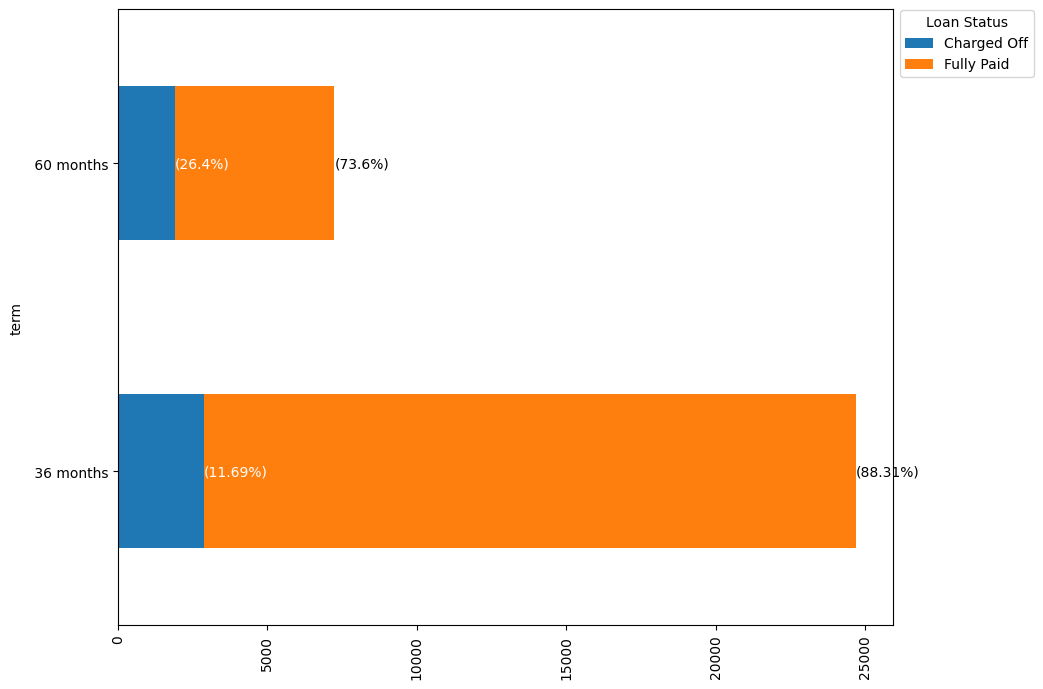

Plotting for  verification_status  against loan status


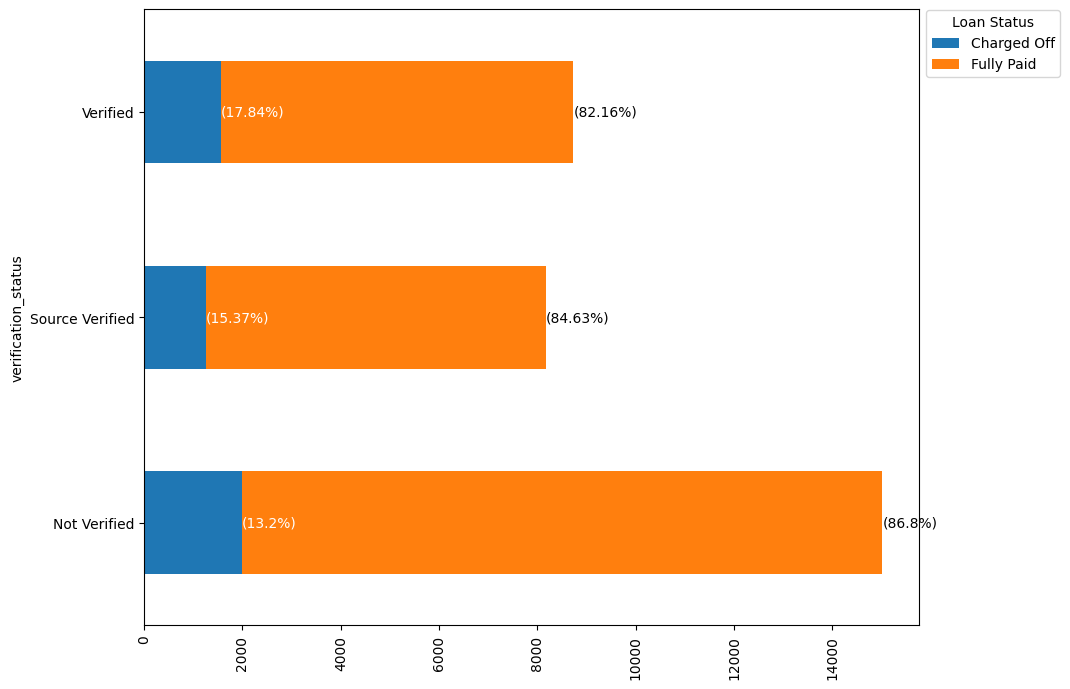

Plotting for  sub_grade  against loan status


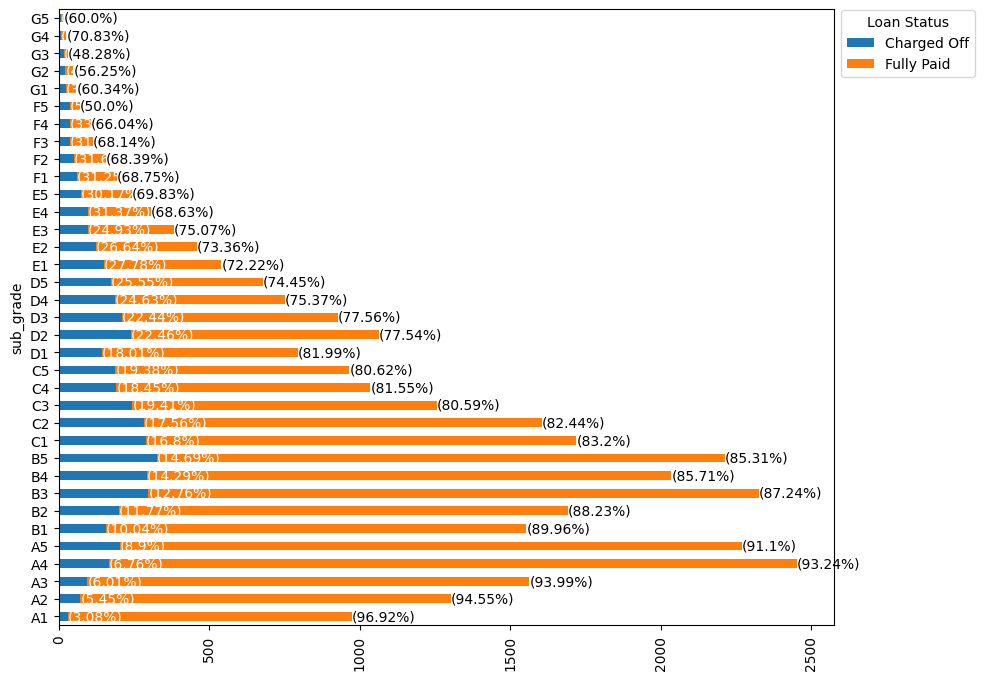

In [58]:
for i in list(set(cat_cols)-set(['loan_status'])):
  print('Plotting for ',i,' against loan status')
  pvt=pd.pivot_table(data=df7, index=i, columns='loan_status', values='int_rate',aggfunc=len, fill_value=0)
  # get the total for each row
  total = pvt.sum(axis=1)
  # calculate the percent for each row
  per = pvt.div(total, axis=0).mul(100).round(2)
  ax = pvt.plot.barh( stacked='True', figsize=[10,8])
  # set the colors for each Loan Status
  segment_colors = {'Charged Off': 'white', 'Fully Paid': 'black'}

  # iterate through the containers
  for c in ax.containers:
      # get the current segment label (a string); corresponds to column / legend
      label = c.get_label()

      # create custom labels with the bar height and the percent from the per column
      labels = [f'({row}%)' if v.get_height() > 0 else '' for v, row in zip(c, per[label])]

      # add the annotation
      ax.bar_label(c, labels=labels, label_type='edge', color=segment_colors[label])

  # move the legend
  _ = ax.legend(title='Loan Status', bbox_to_anchor=(1, 1.01), loc='upper left')
  _ = ax.margins(y=0.1)
  plt.xticks(rotation=90)
  plt.show()

###Analysis only on **Charged Off** data

In [ ]:
df8=df7[df7['loan_status']=='Charged Off']
df8.shape

(4796, 37)

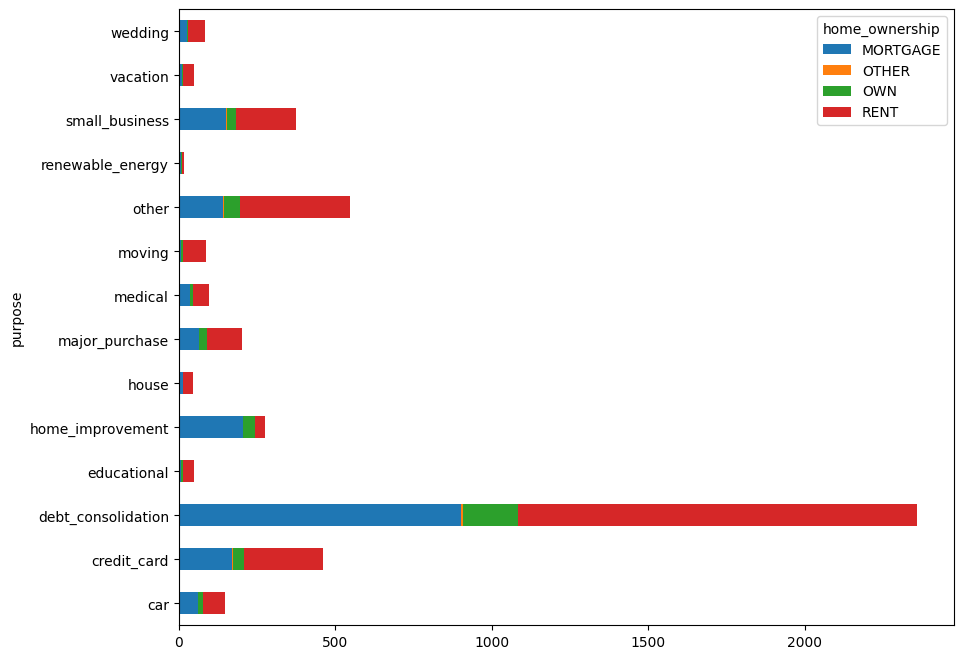

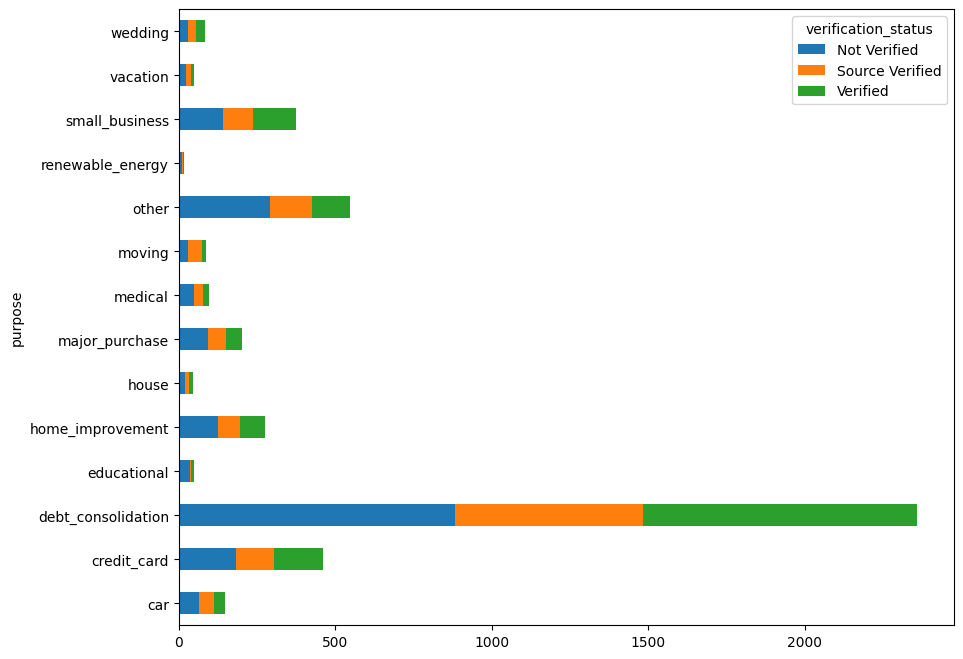

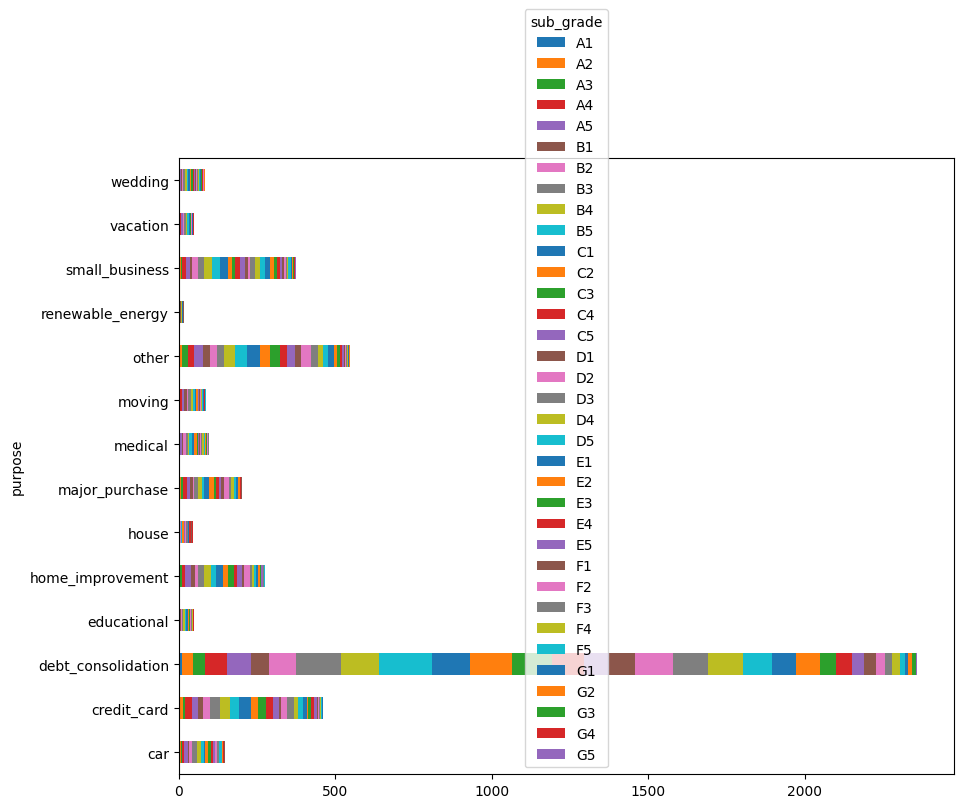

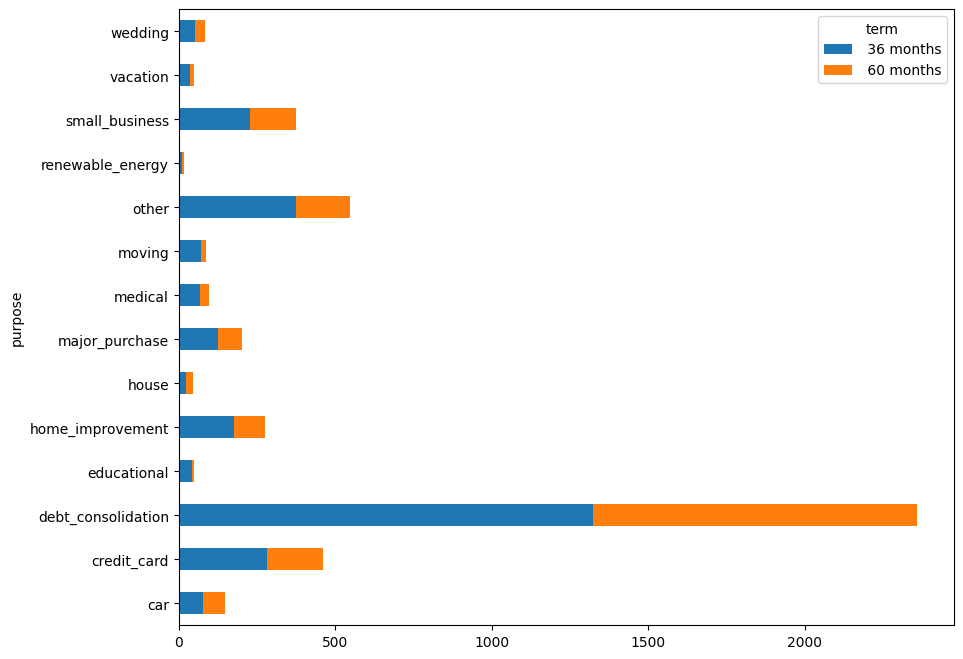

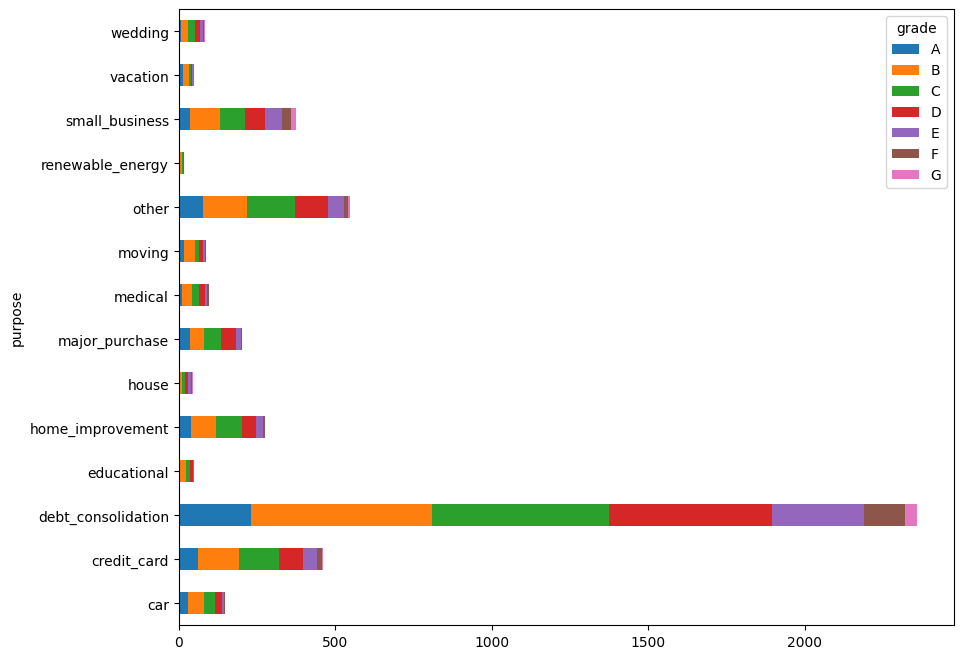

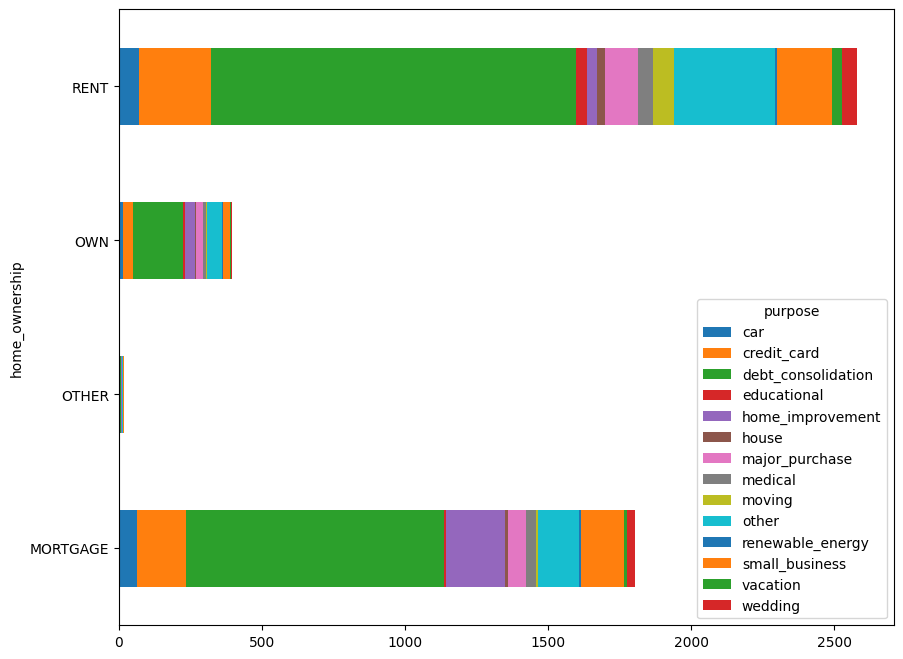

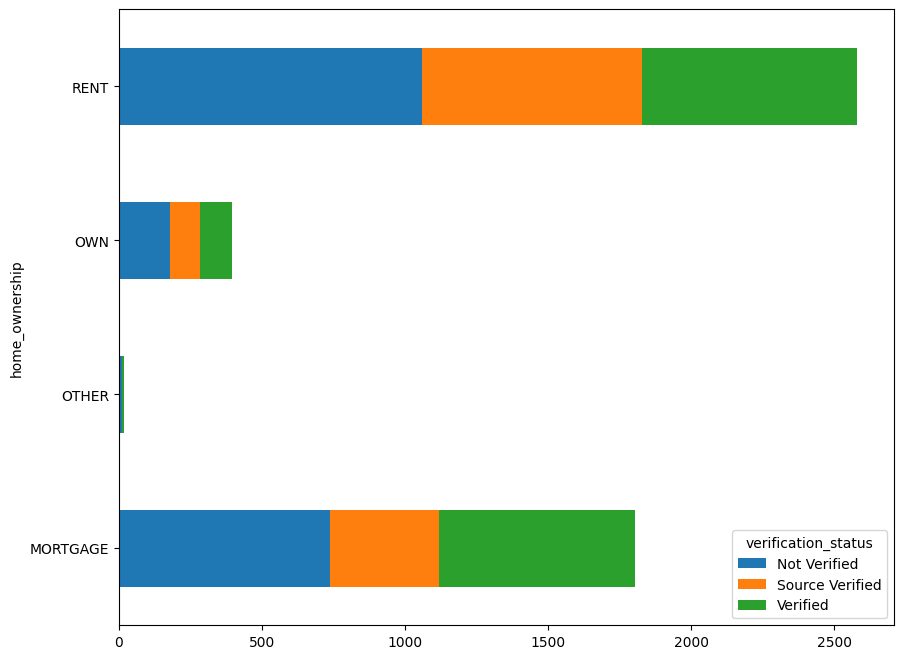

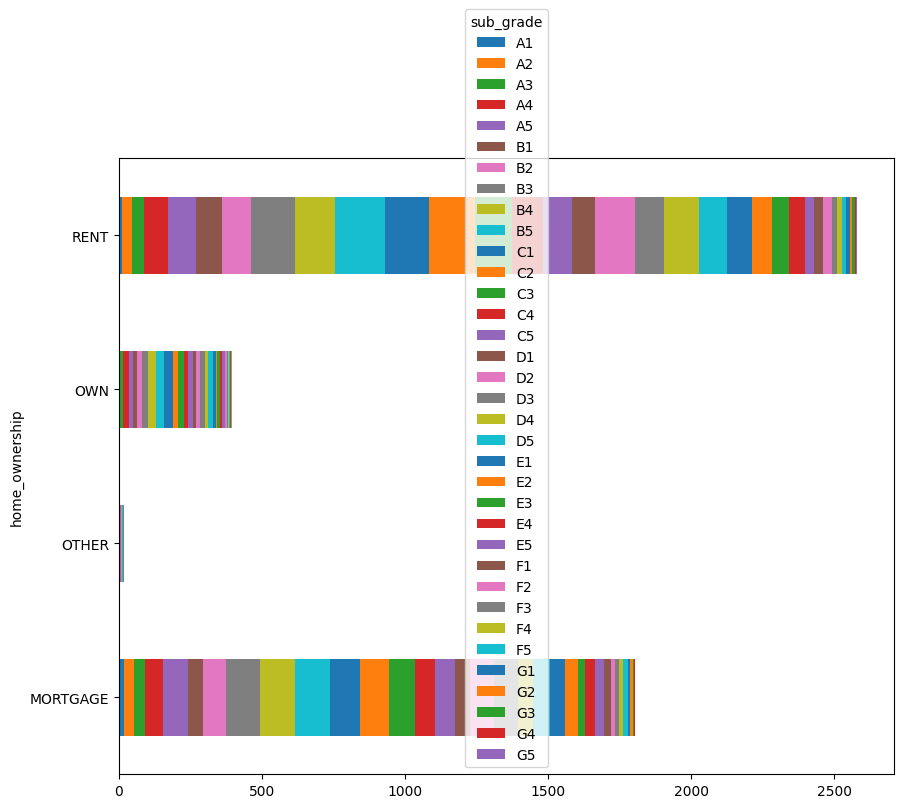

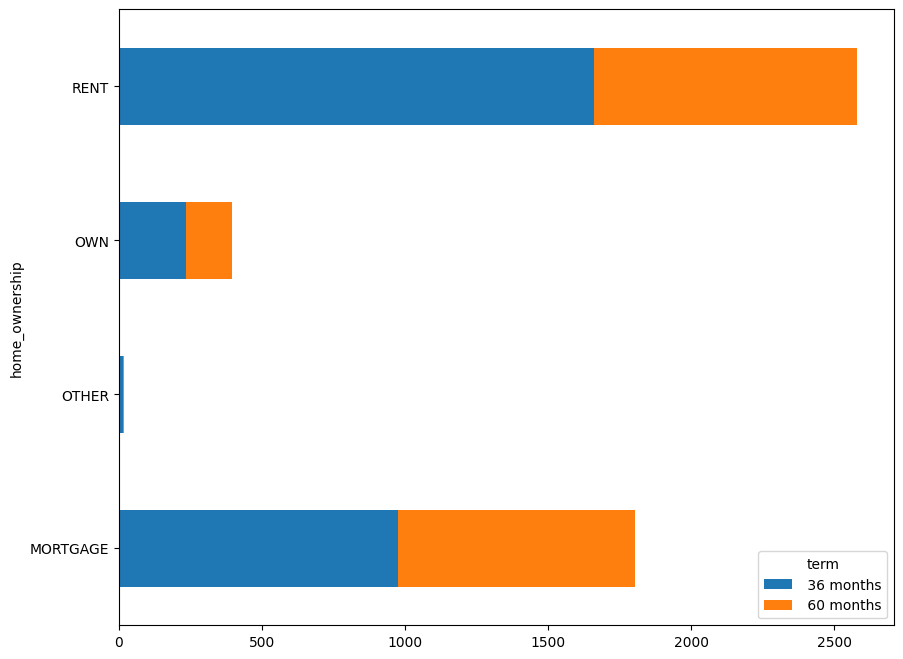

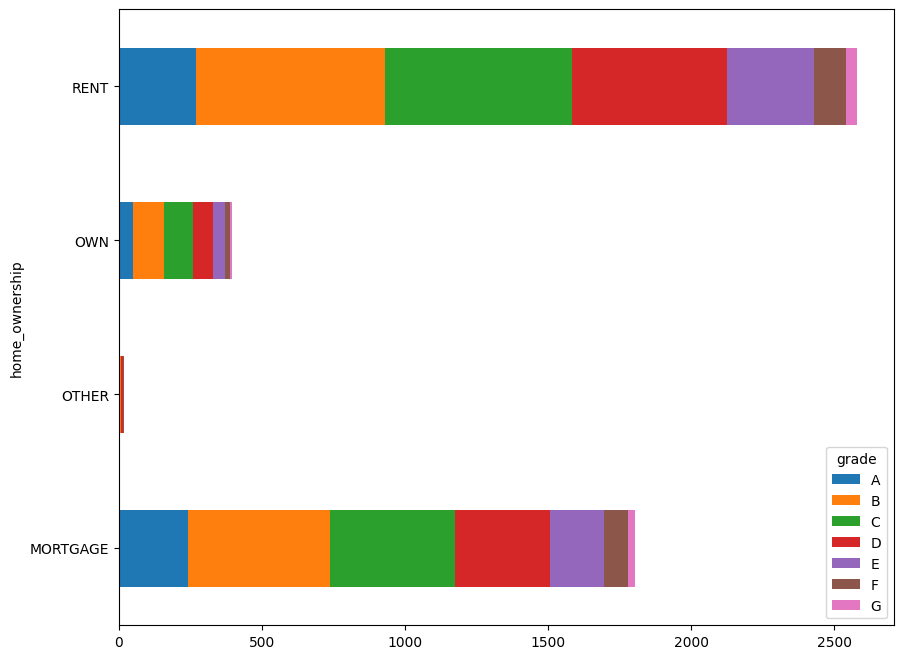

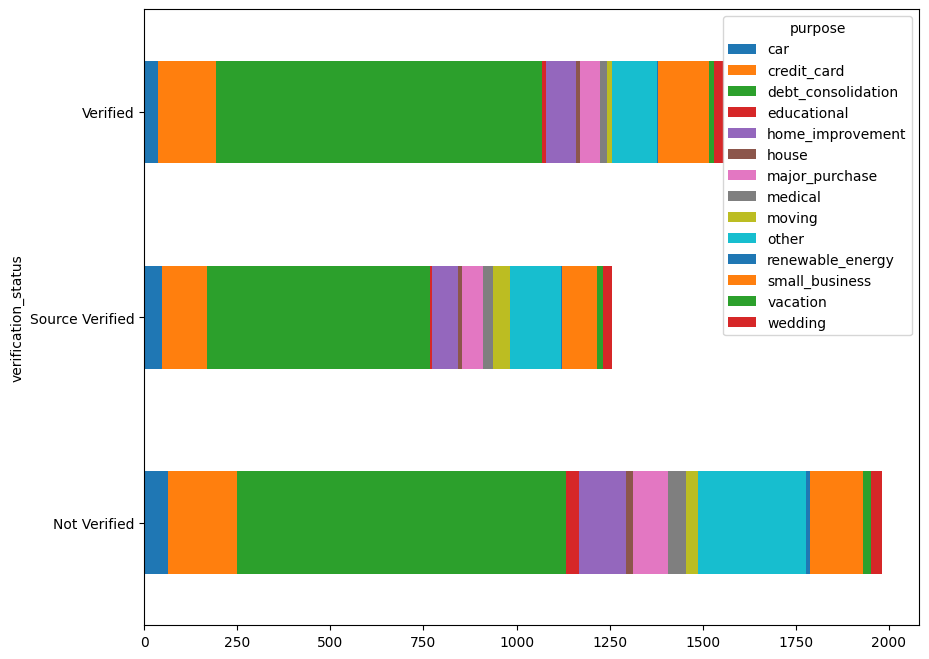

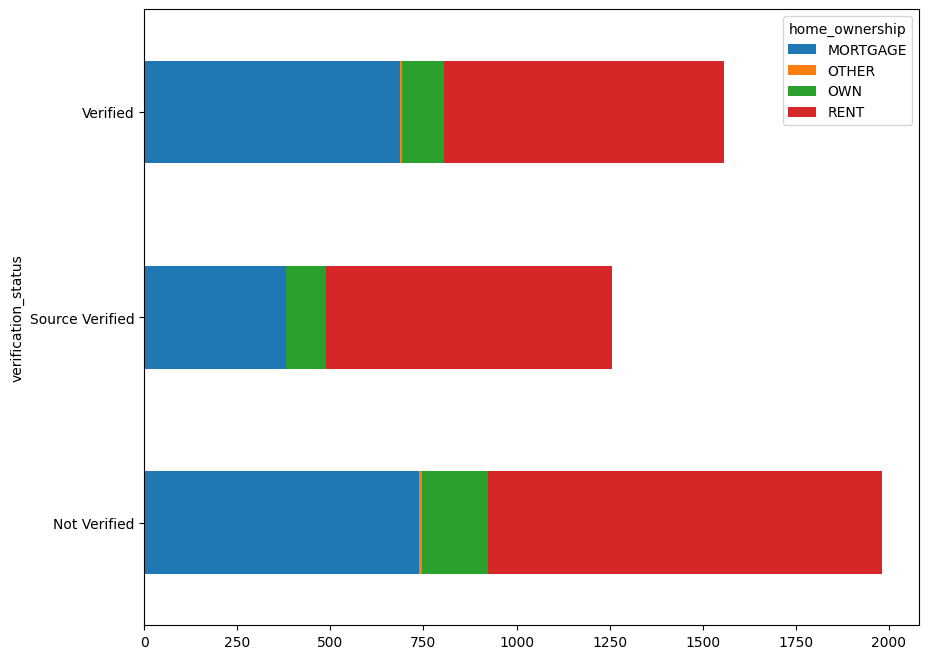

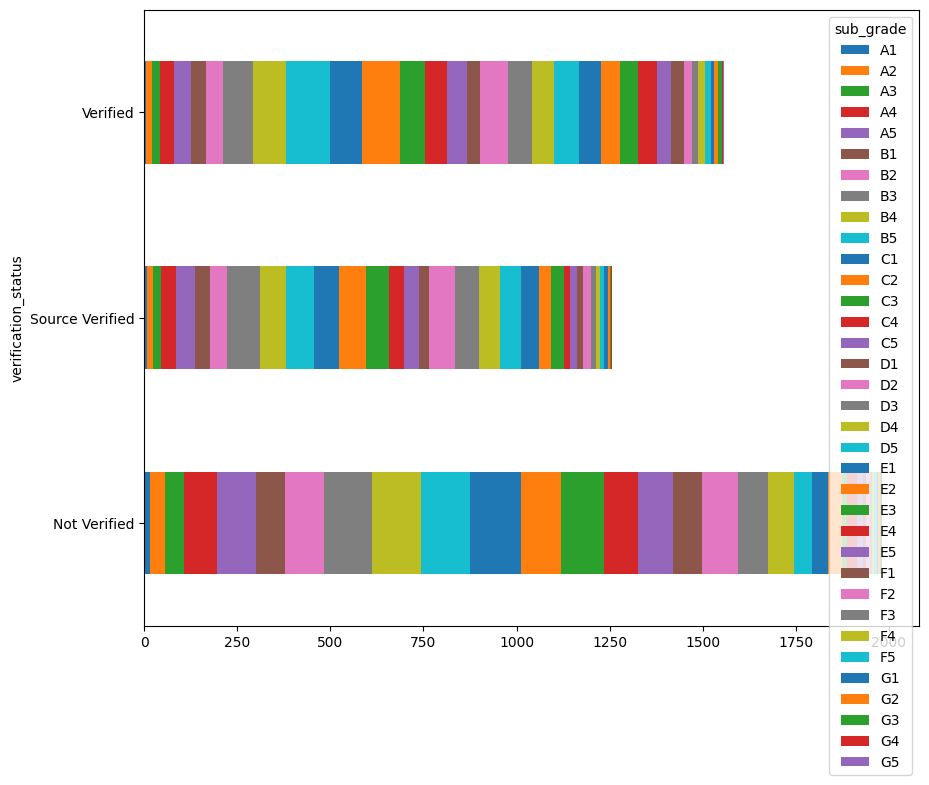

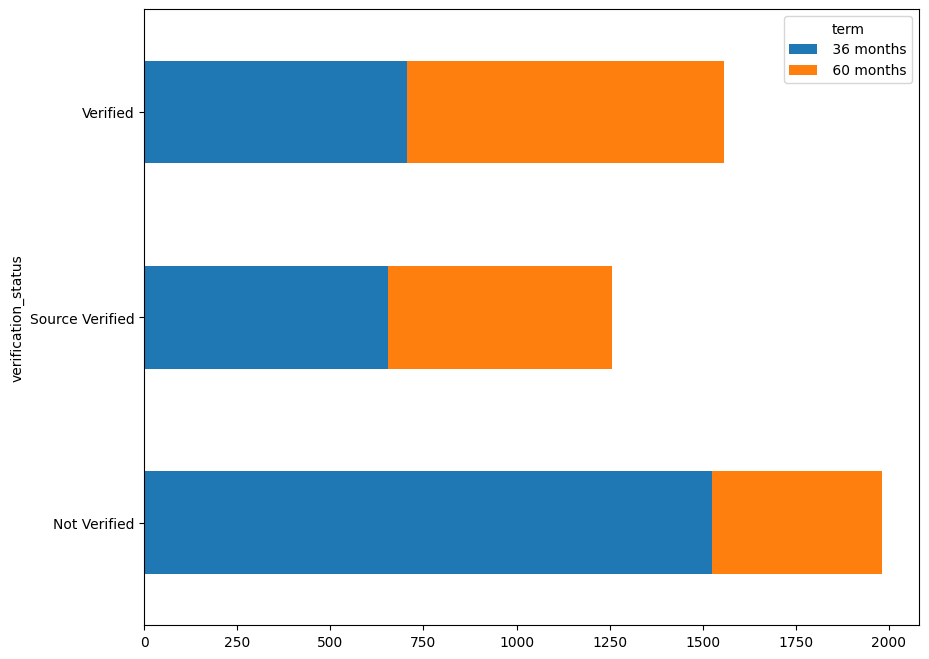

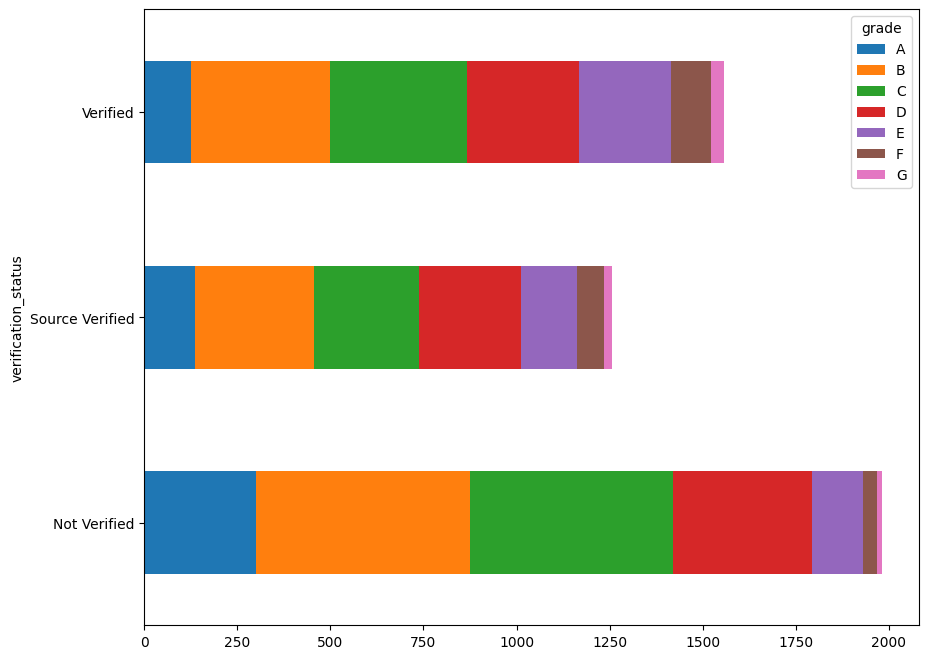

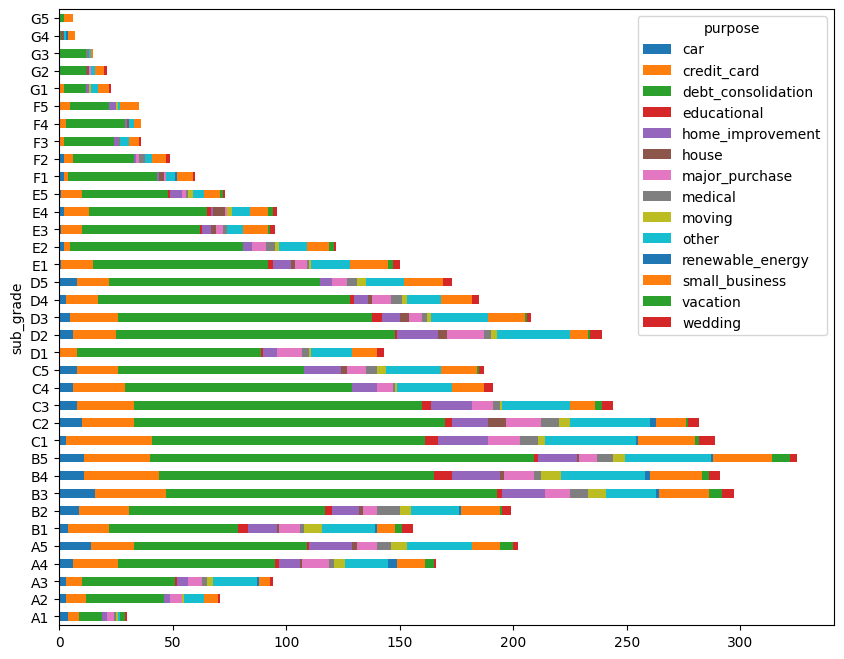

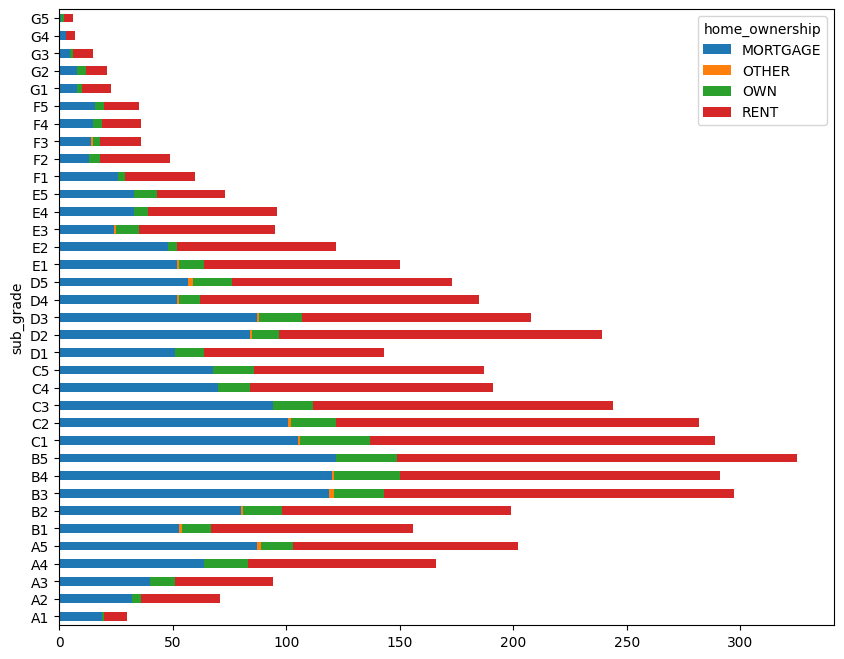

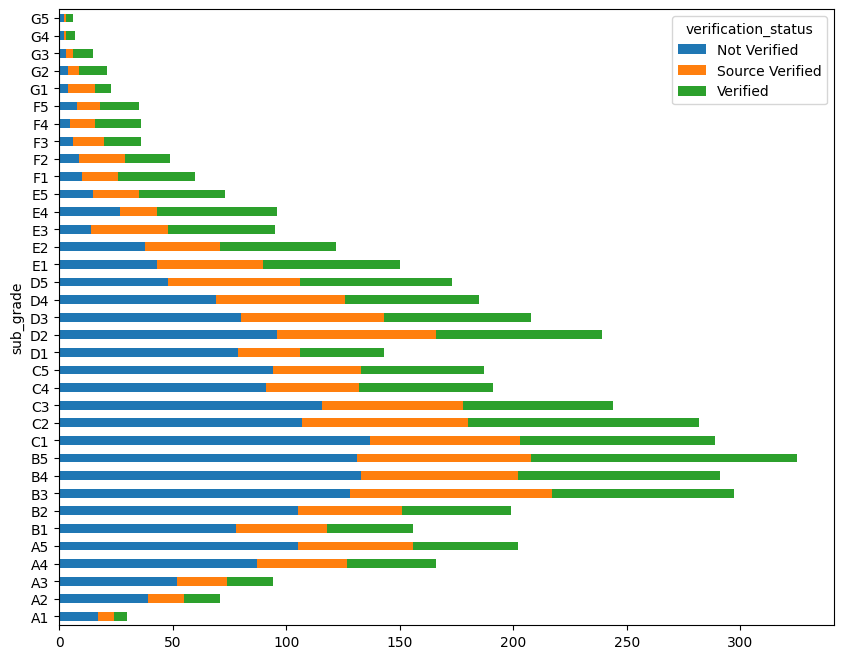

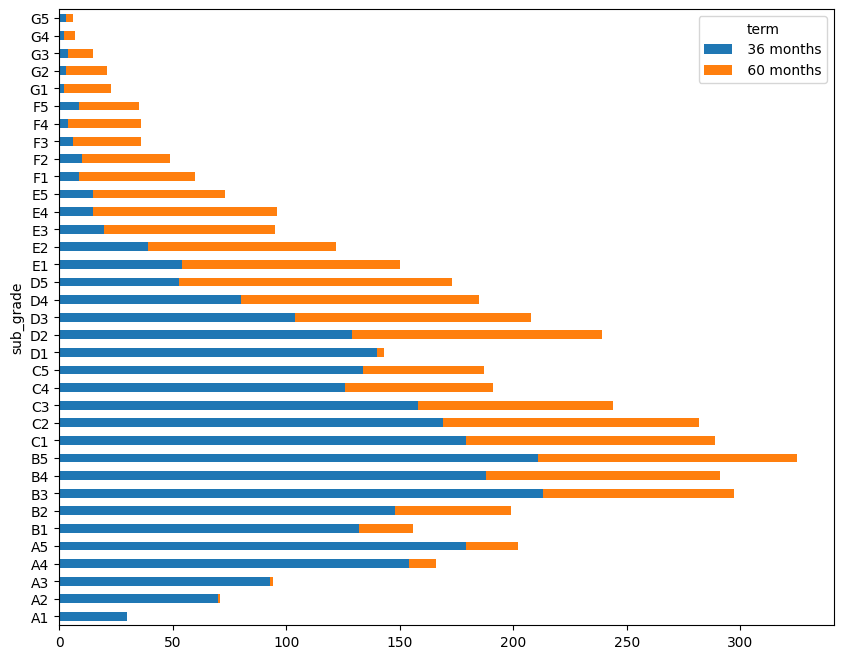

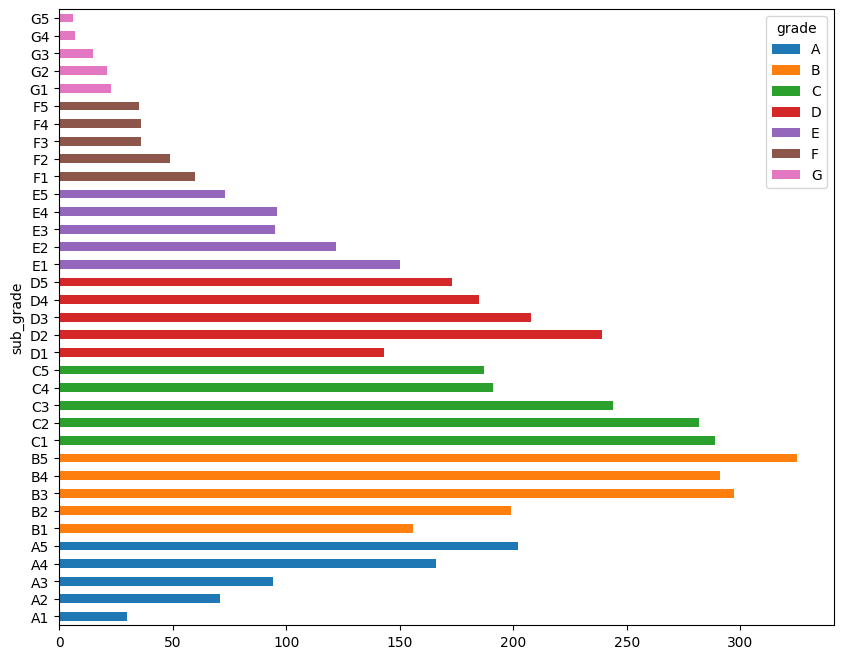

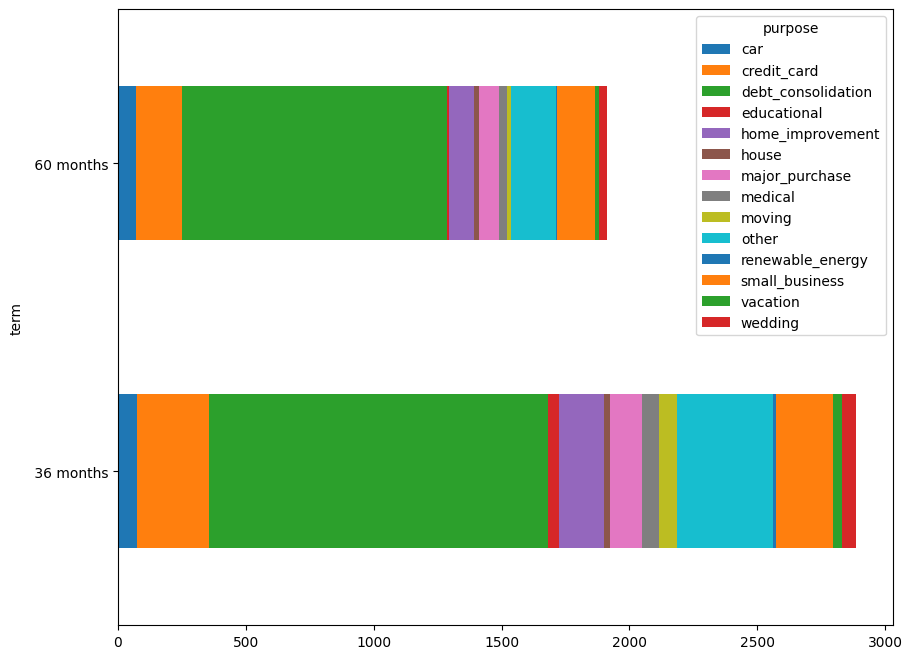

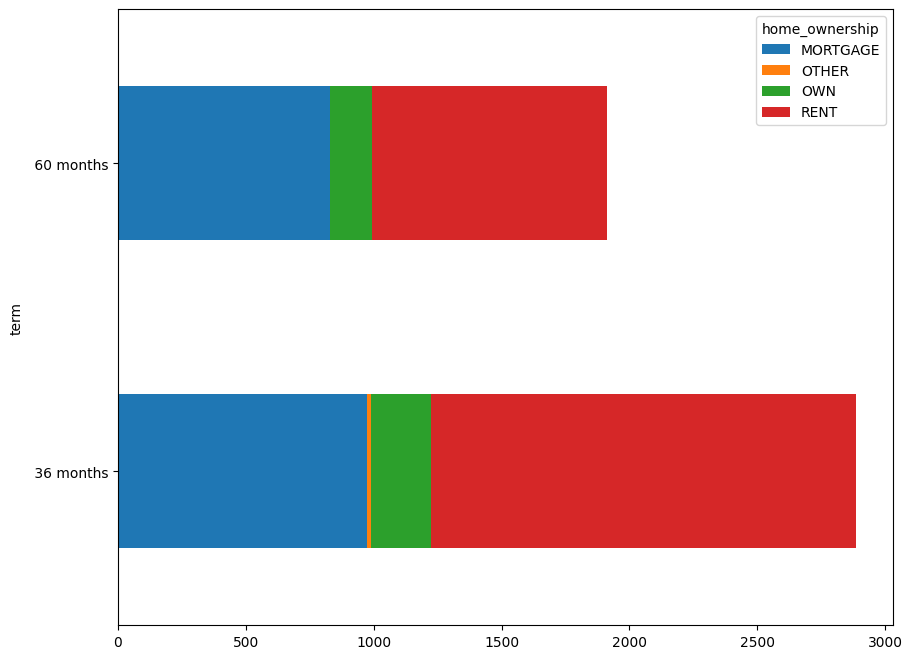

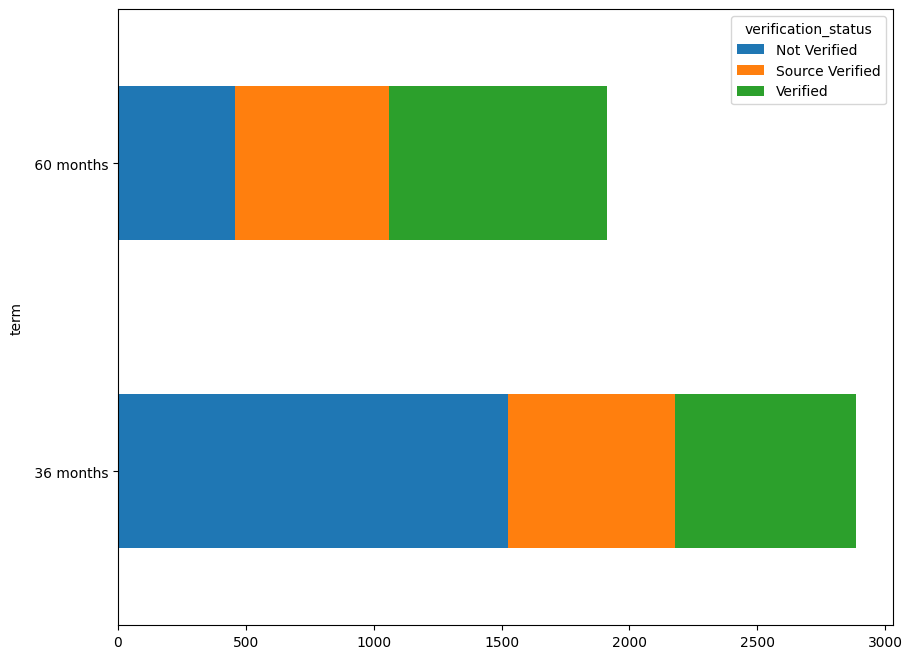

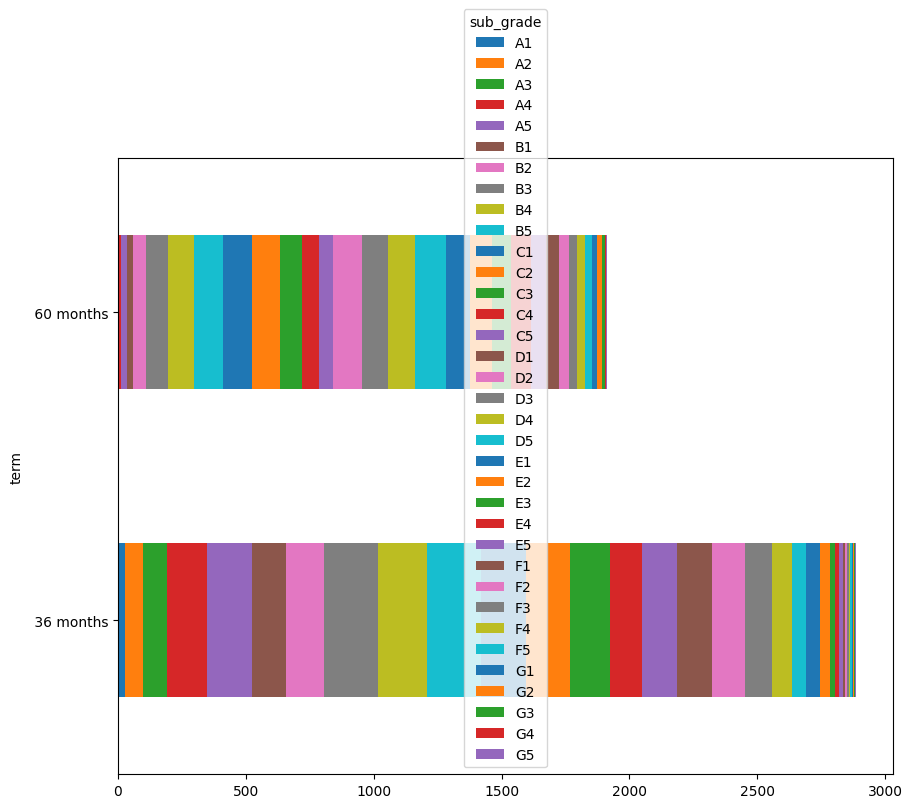

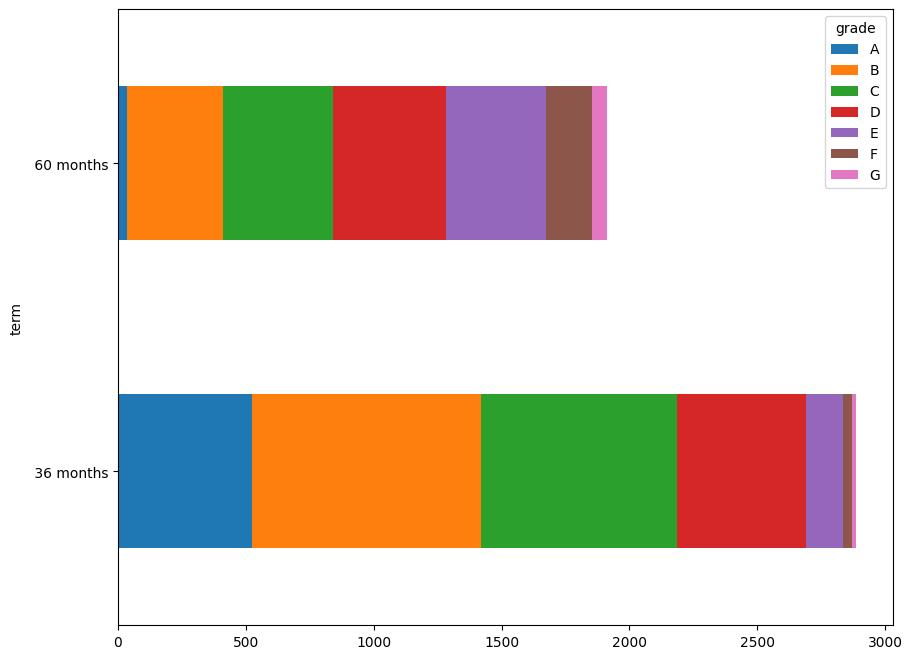

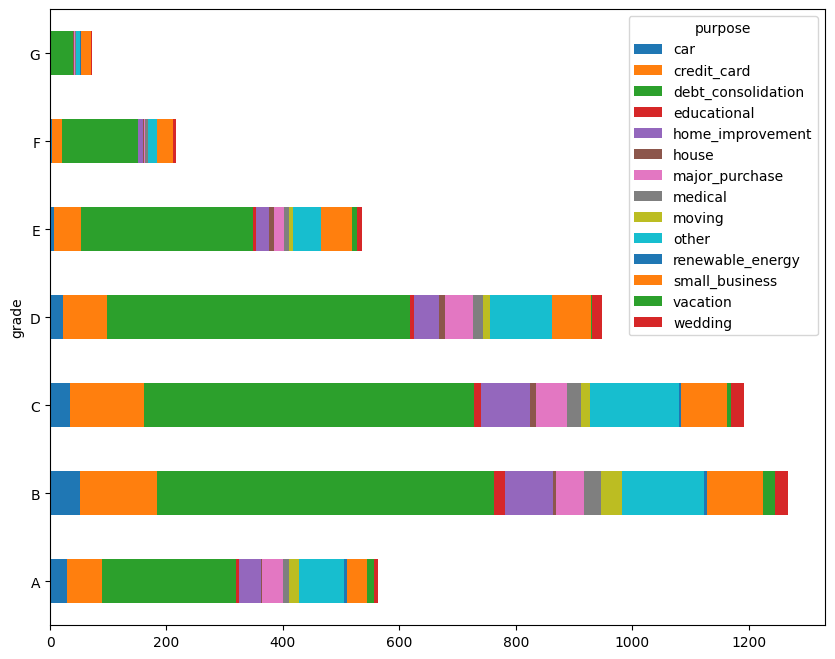

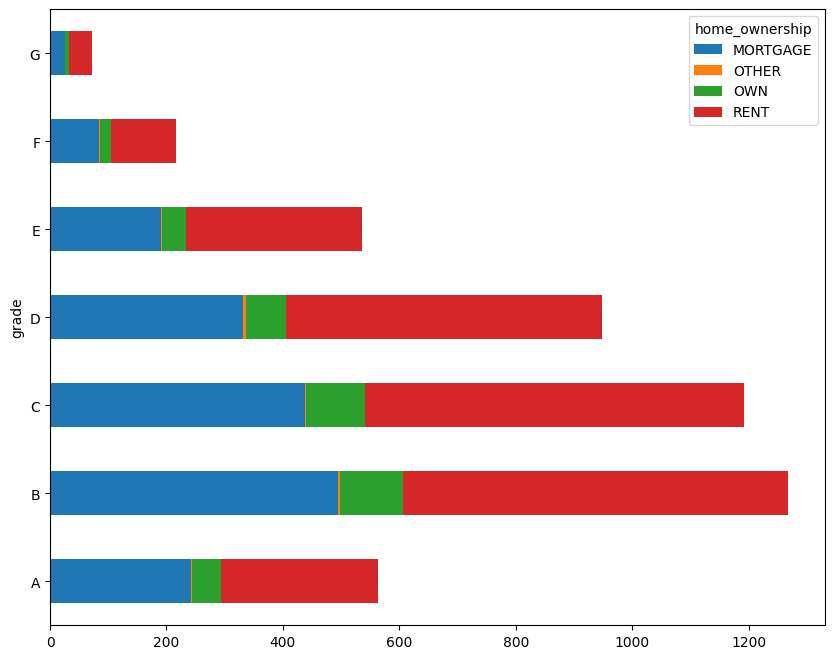

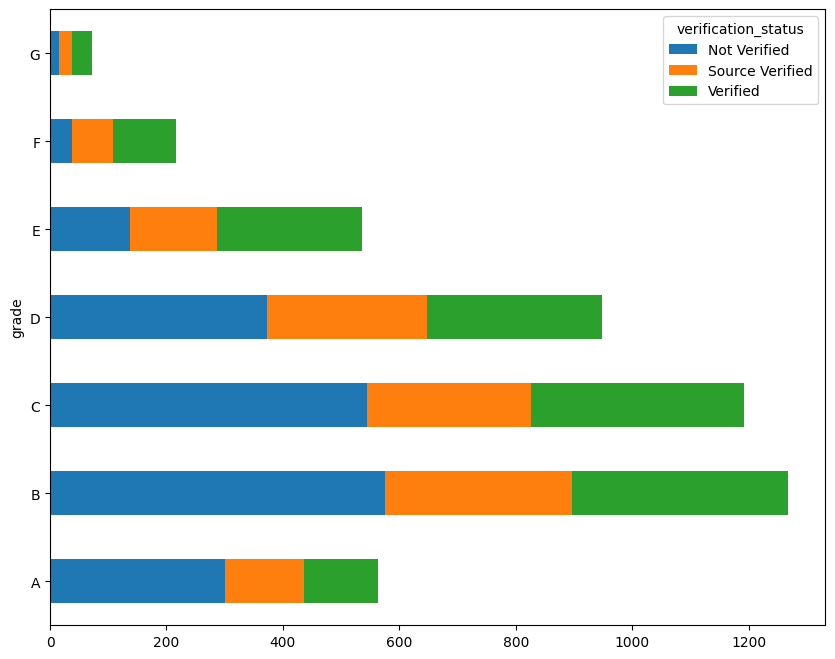

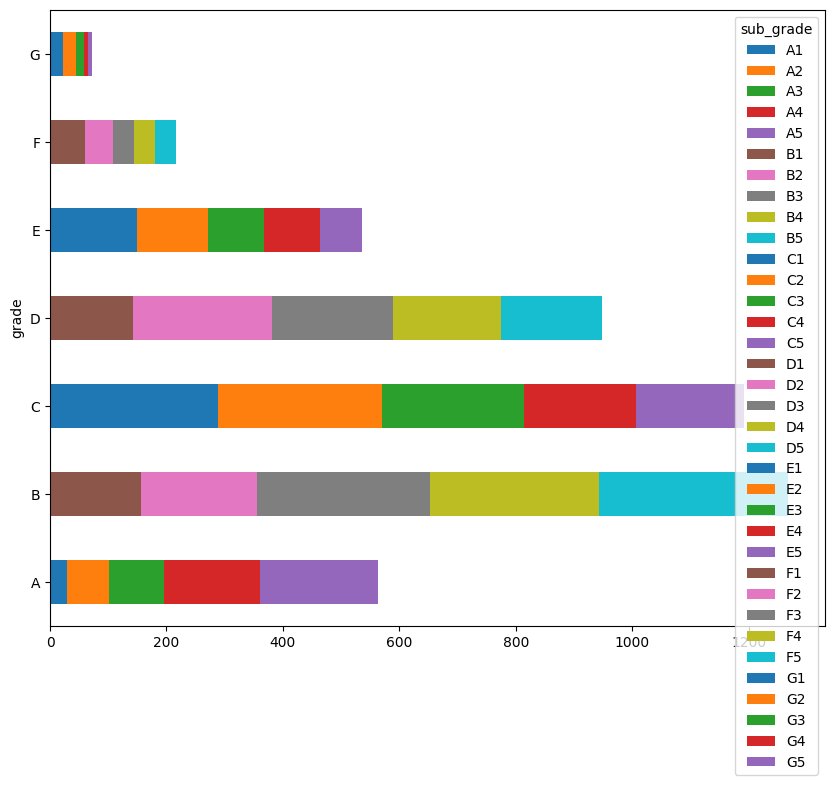

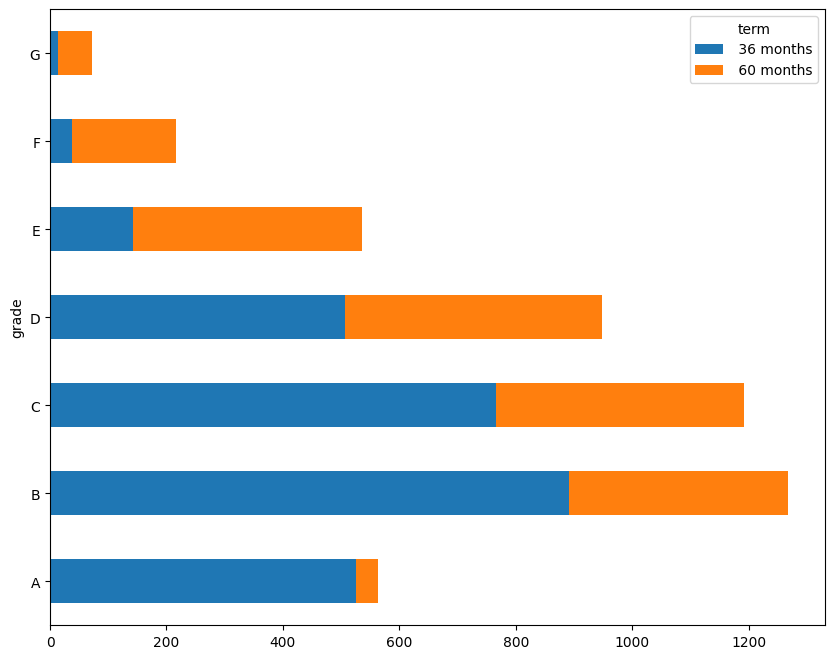

In [ ]:
cat_cols_without_loan_status=list(set(cat_cols)-set(['loan_status']))
for i in cat_cols_without_loan_status:
  for j in cat_cols_without_loan_status:
    if(i!=j):
      pvt=pd.pivot_table(data=df8, index=i, columns=j, values='int_rate',aggfunc=len, fill_value=0)
      pvt.plot.barh( stacked='True', figsize=[10,8])



###Analysis on different categorical columns on All data*(Fully paid & Charged off) records/data

boxplot of  purpose  vs loan_amnt


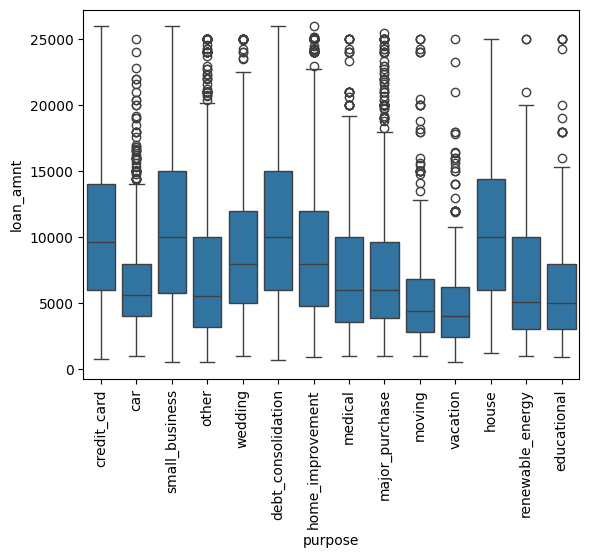

boxplot of  purpose  vs int_rate


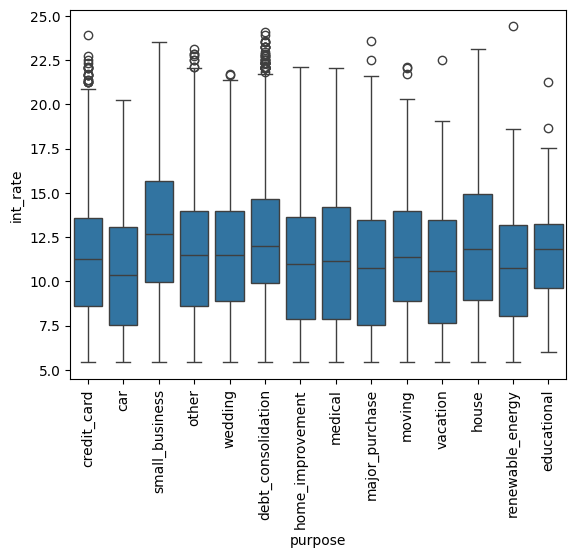

boxplot of  purpose  vs installment


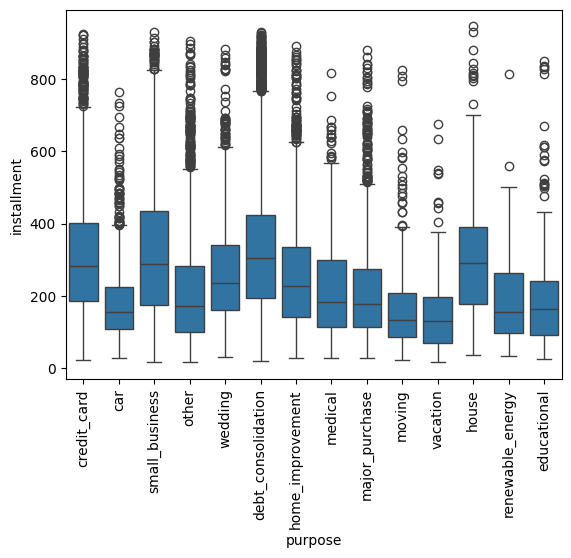

boxplot of  purpose  vs annual_inc


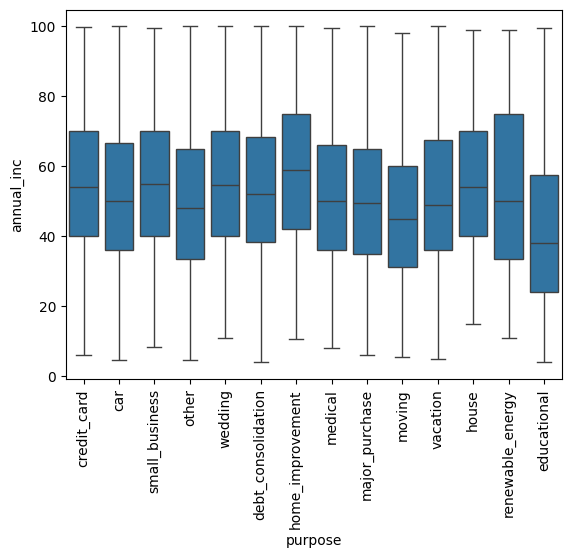

boxplot of  purpose  vs dti


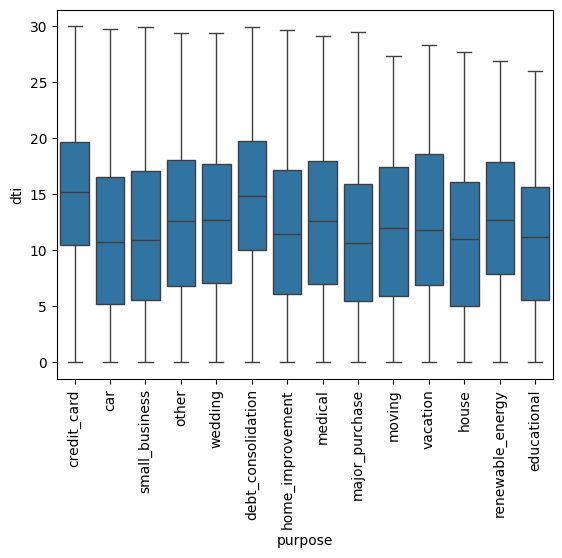

boxplot of  purpose  vs delinq_2yrs


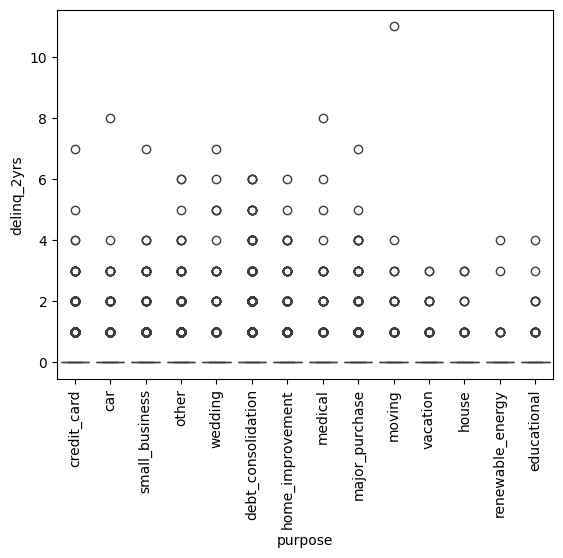

boxplot of  purpose  vs revol_util


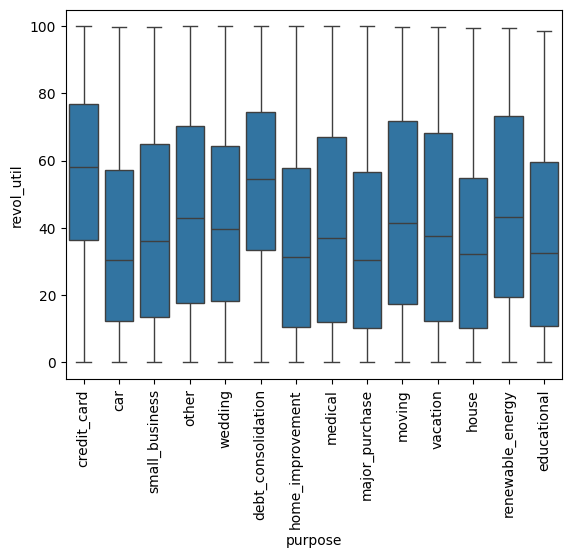

boxplot of  purpose  vs inq_last_6mths


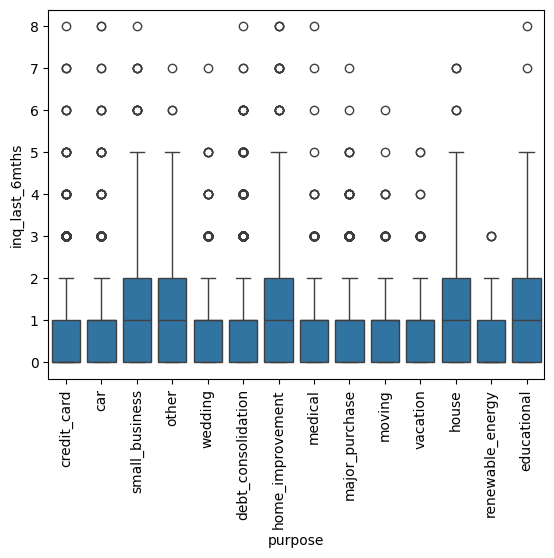

boxplot of  home_ownership  vs loan_amnt


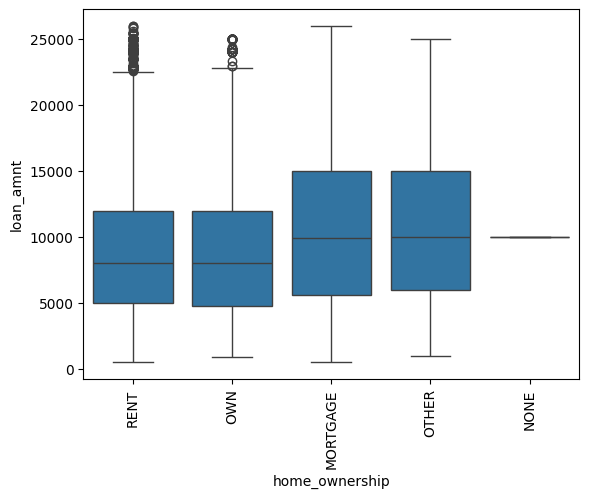

boxplot of  home_ownership  vs int_rate


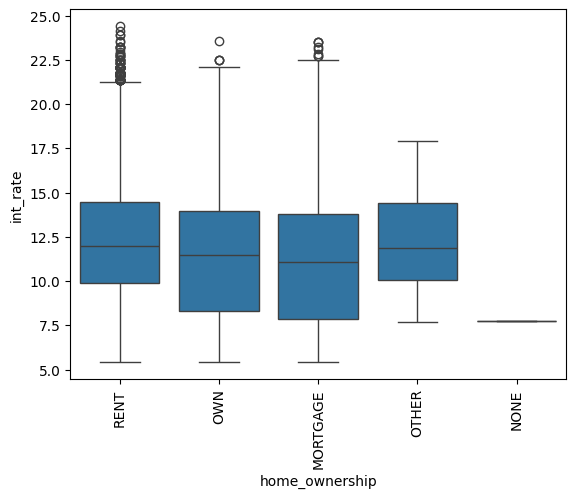

boxplot of  home_ownership  vs installment


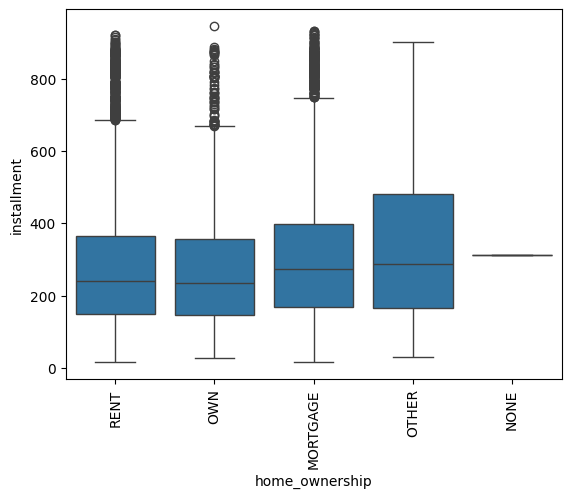

boxplot of  home_ownership  vs annual_inc


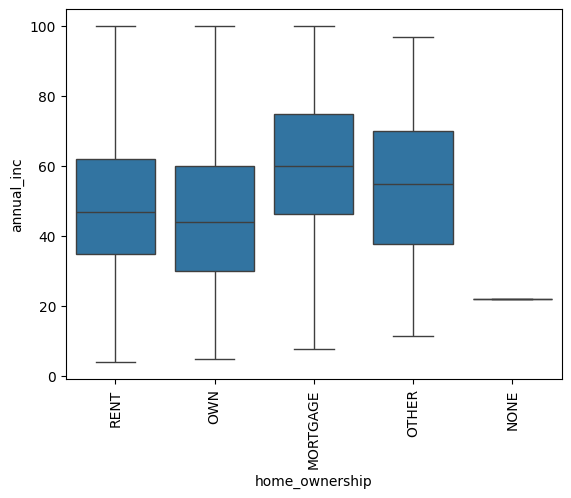

boxplot of  home_ownership  vs dti


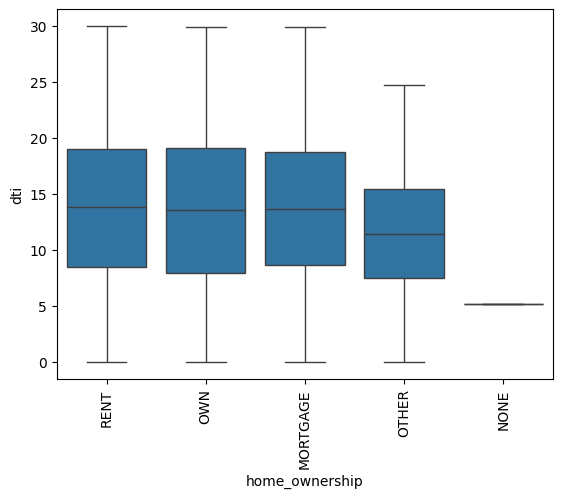

boxplot of  home_ownership  vs delinq_2yrs


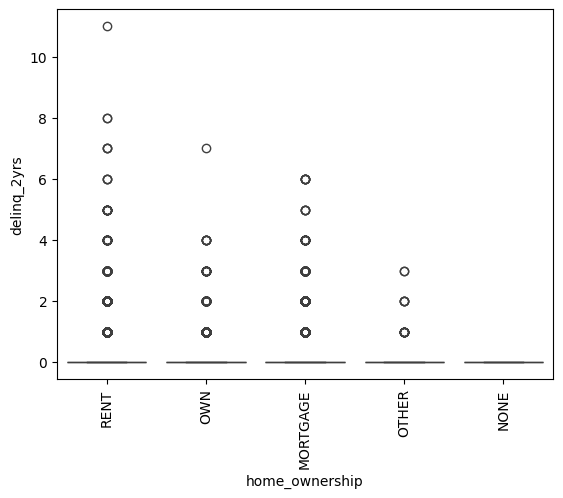

boxplot of  home_ownership  vs revol_util


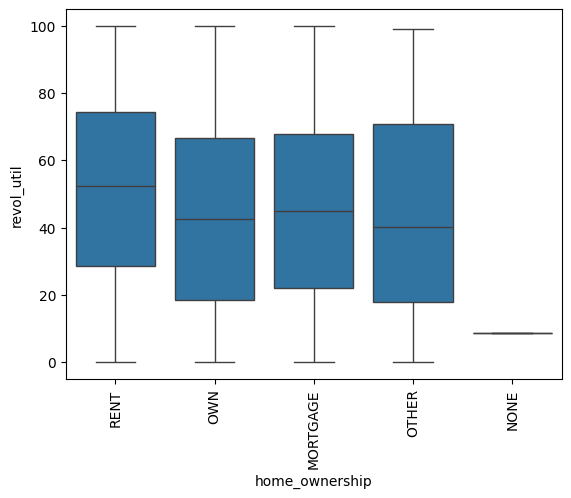

boxplot of  home_ownership  vs inq_last_6mths


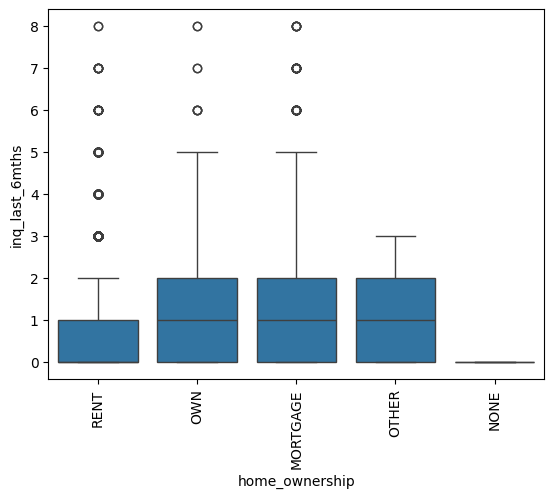

boxplot of  verification_status  vs loan_amnt


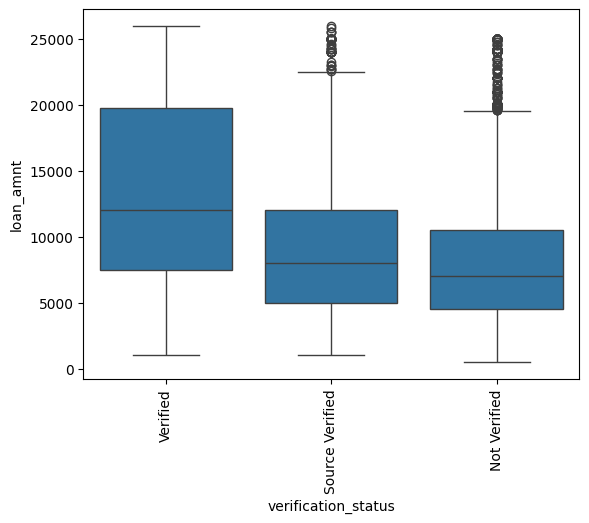

boxplot of  verification_status  vs int_rate


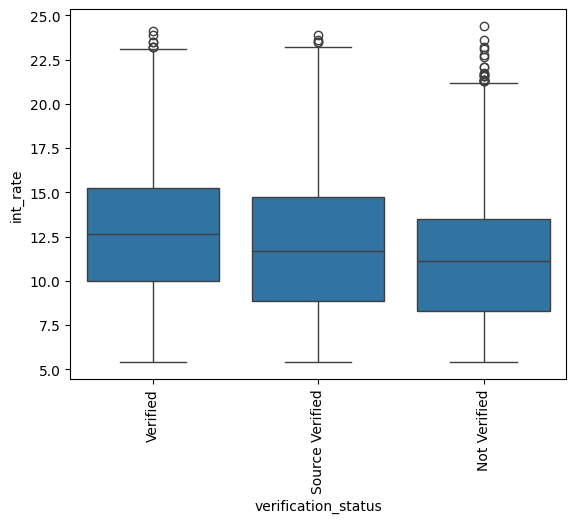

boxplot of  verification_status  vs installment


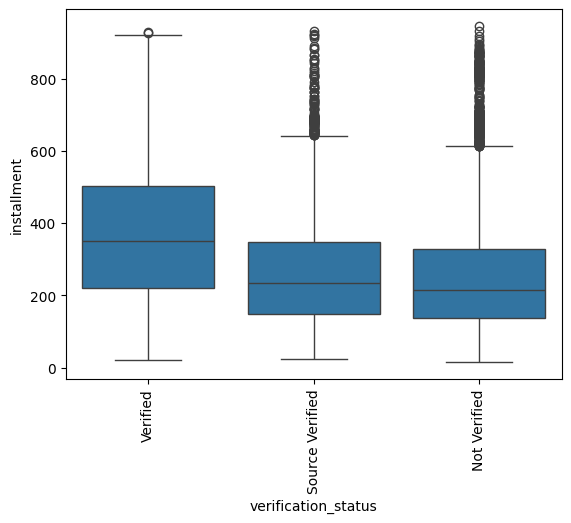

boxplot of  verification_status  vs annual_inc


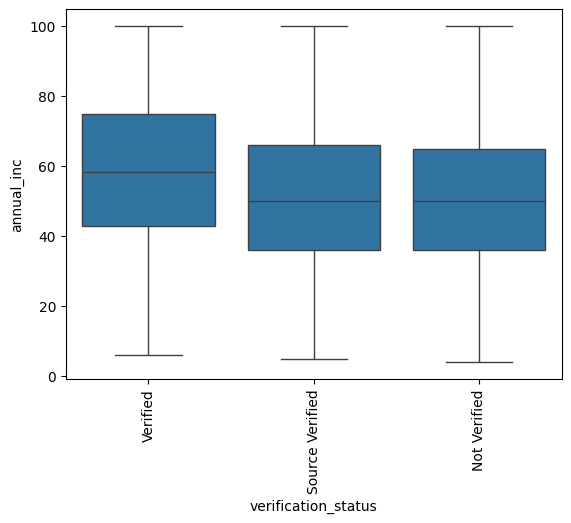

boxplot of  verification_status  vs dti


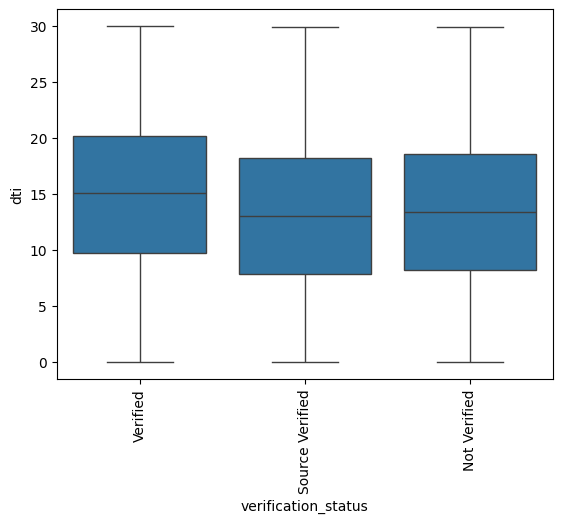

boxplot of  verification_status  vs delinq_2yrs


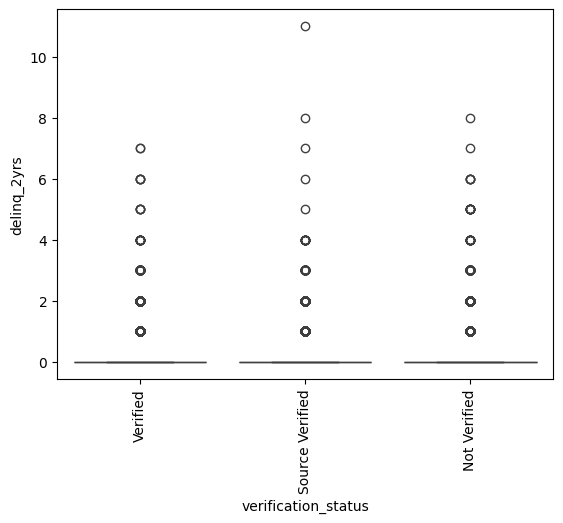

boxplot of  verification_status  vs revol_util


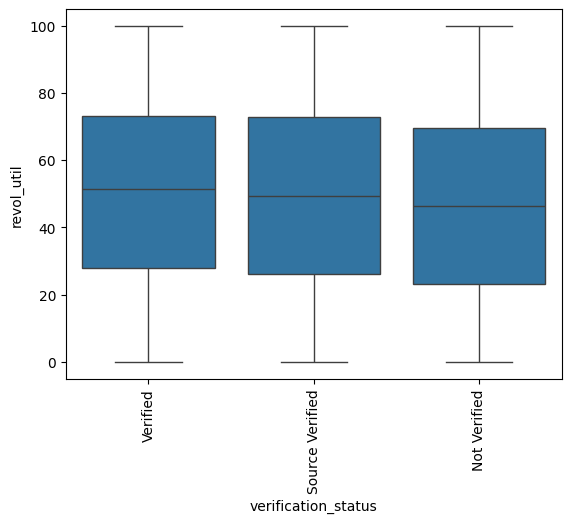

boxplot of  verification_status  vs inq_last_6mths


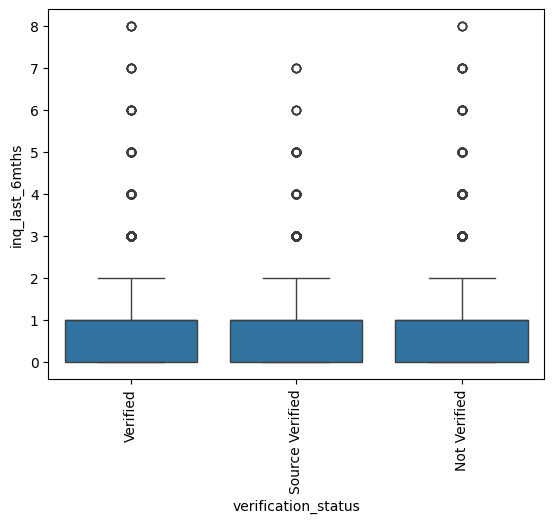

boxplot of  sub_grade  vs loan_amnt


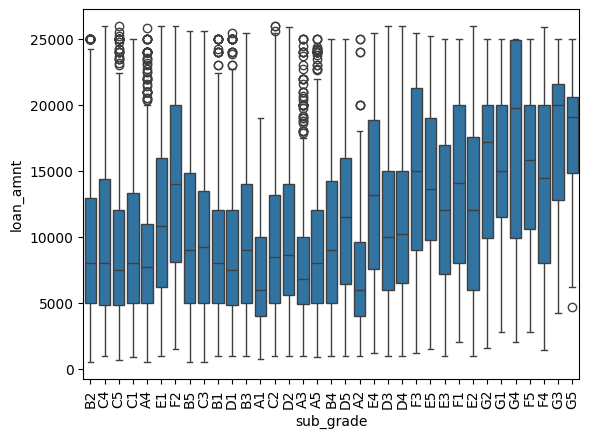

boxplot of  sub_grade  vs int_rate


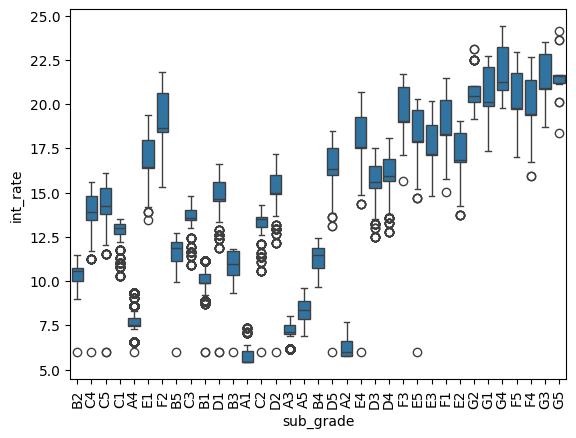

boxplot of  sub_grade  vs installment


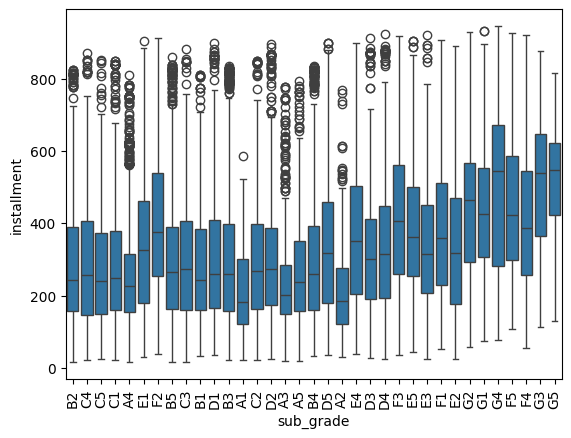

boxplot of  sub_grade  vs annual_inc


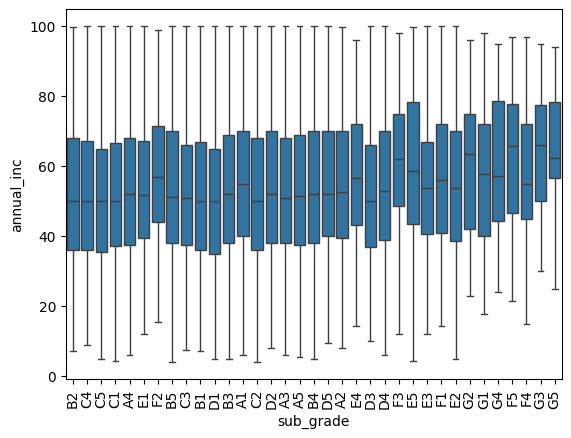

boxplot of  sub_grade  vs dti


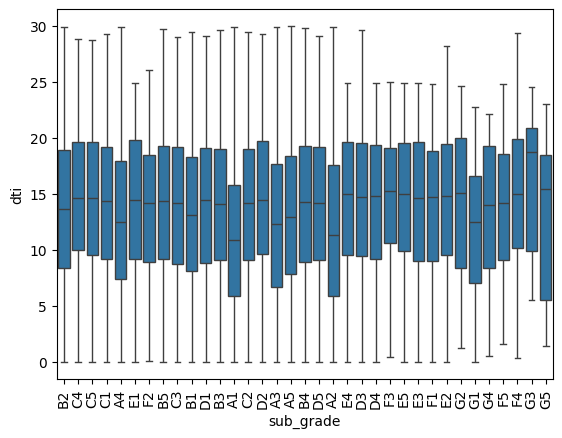

boxplot of  sub_grade  vs delinq_2yrs


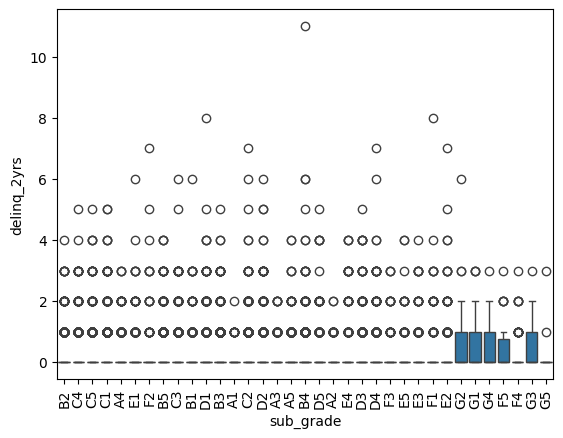

boxplot of  sub_grade  vs revol_util


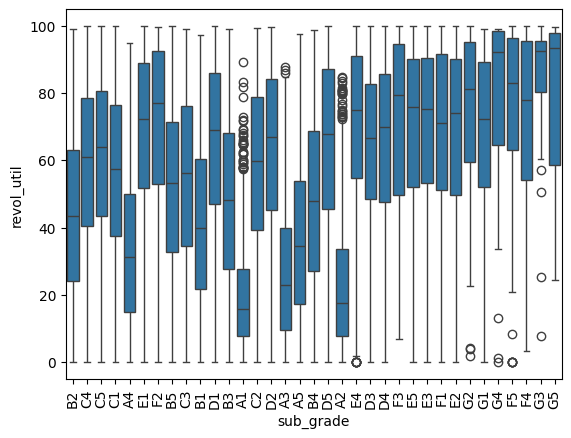

boxplot of  sub_grade  vs inq_last_6mths


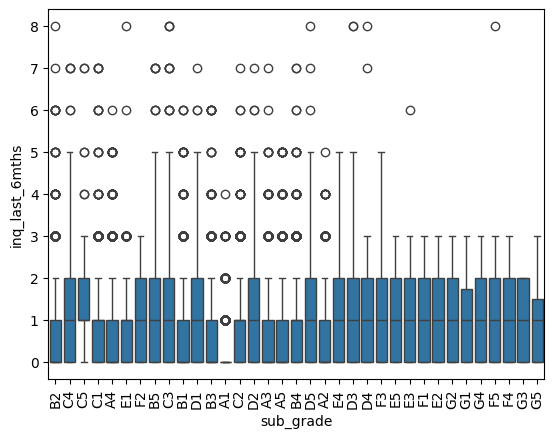

boxplot of  term  vs loan_amnt


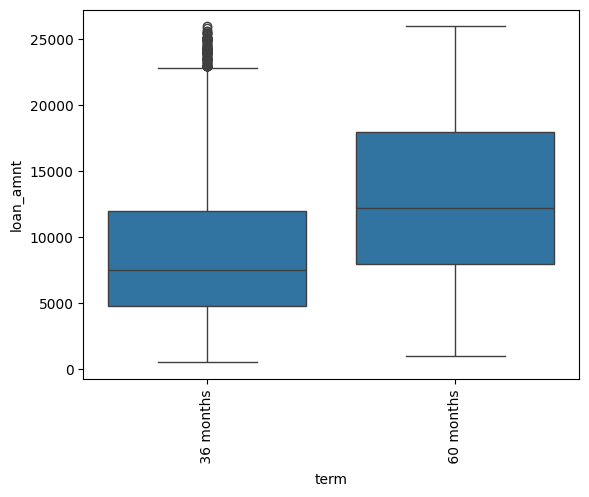

boxplot of  term  vs int_rate


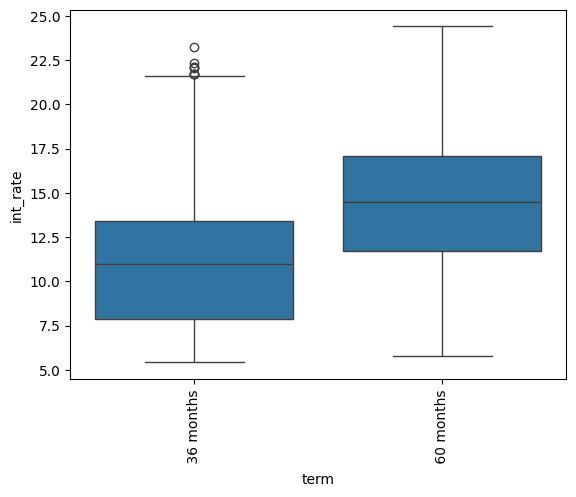

boxplot of  term  vs installment


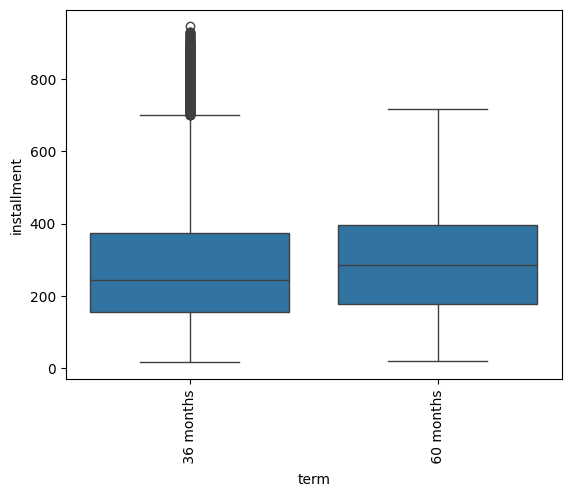

boxplot of  term  vs annual_inc


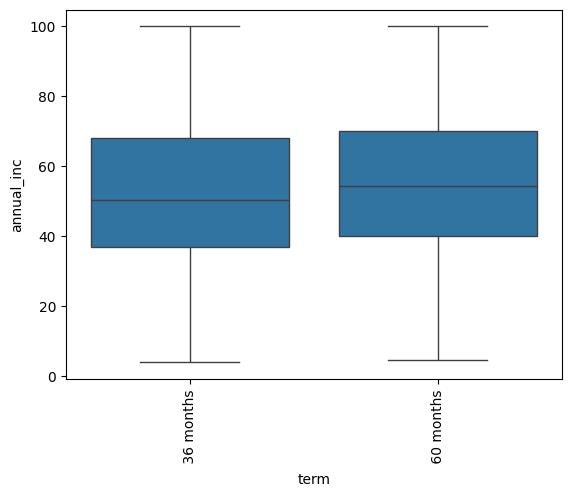

boxplot of  term  vs dti


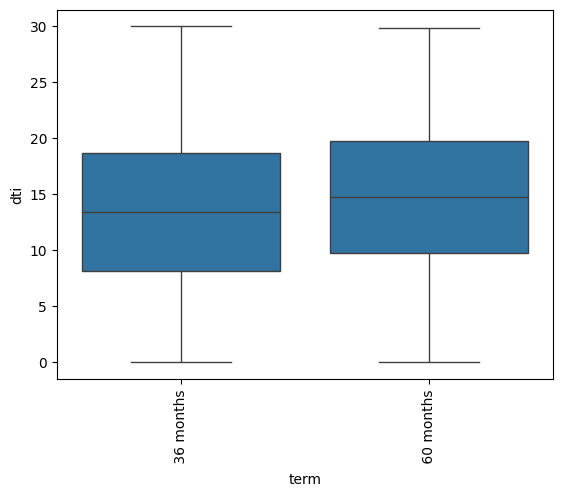

boxplot of  term  vs delinq_2yrs


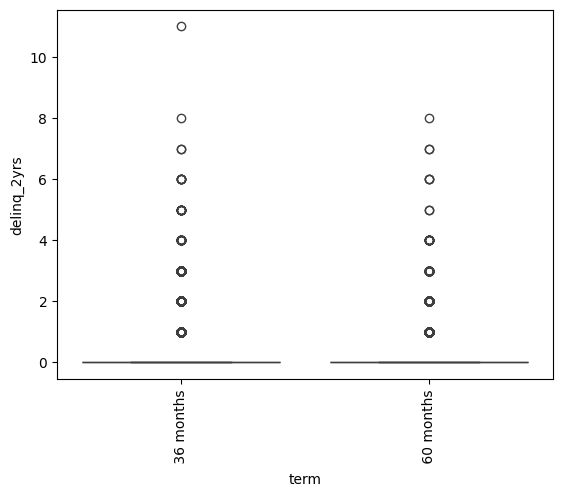

boxplot of  term  vs revol_util


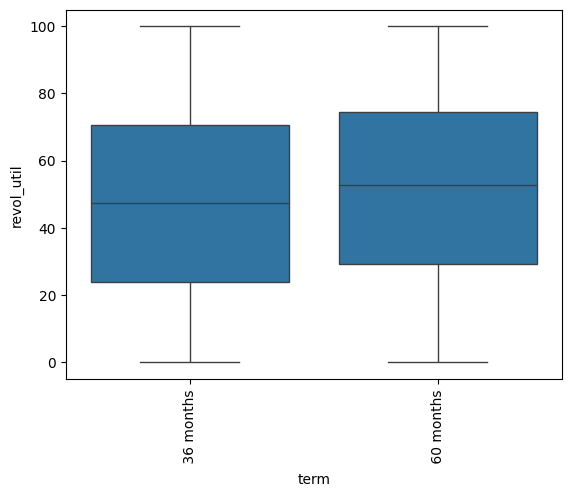

boxplot of  term  vs inq_last_6mths


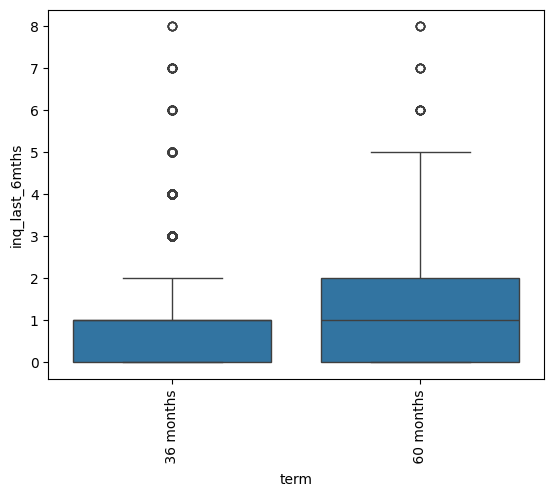

boxplot of  grade  vs loan_amnt


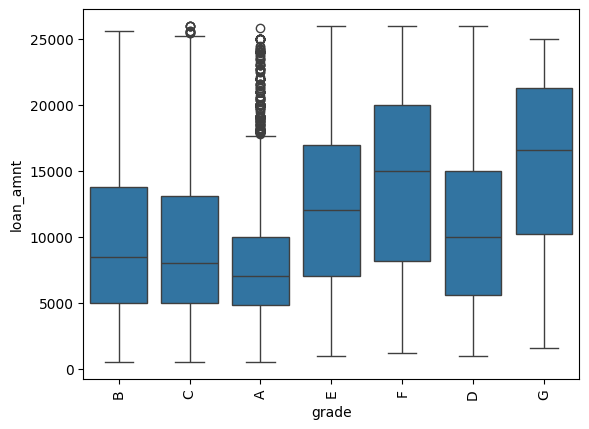

boxplot of  grade  vs int_rate


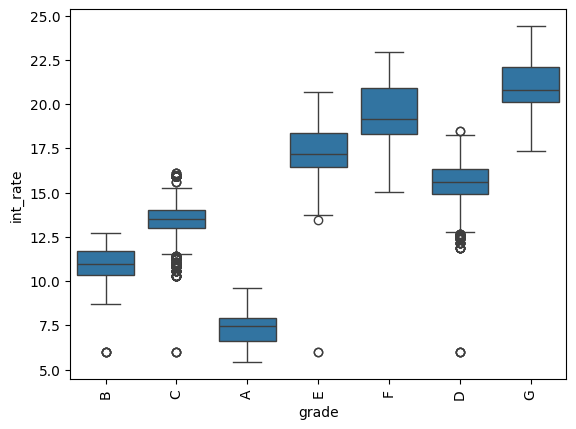

boxplot of  grade  vs installment


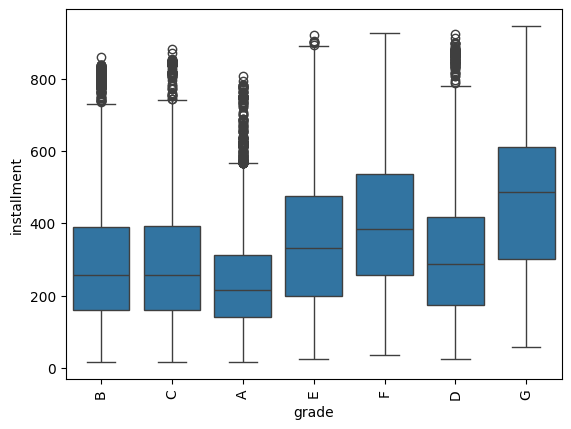

boxplot of  grade  vs annual_inc


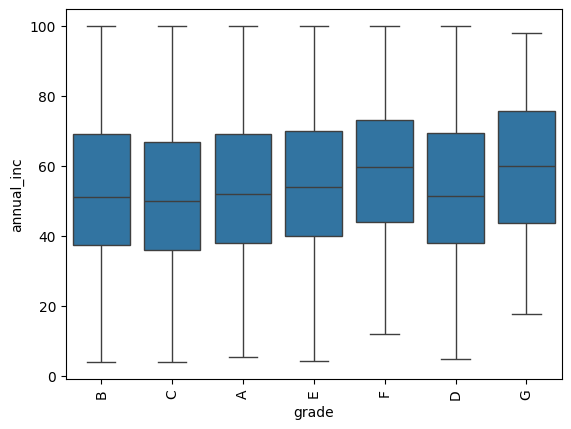

boxplot of  grade  vs dti


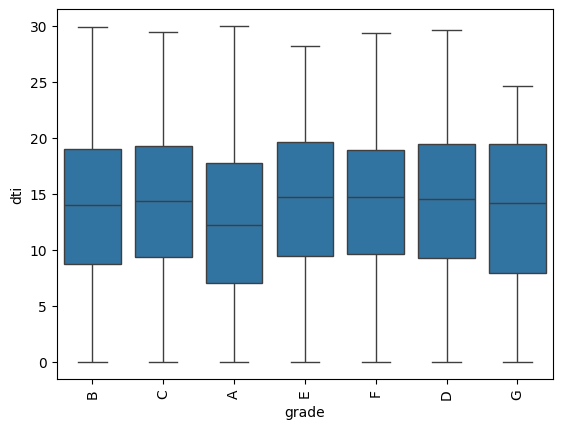

boxplot of  grade  vs delinq_2yrs


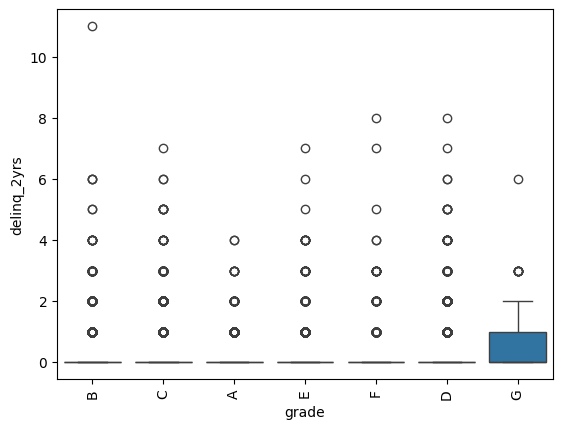

boxplot of  grade  vs revol_util


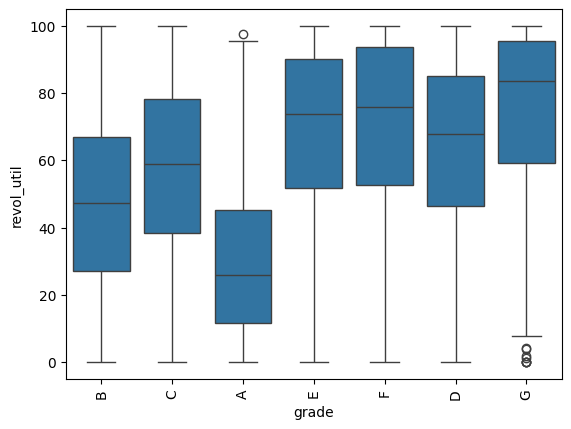

boxplot of  grade  vs inq_last_6mths


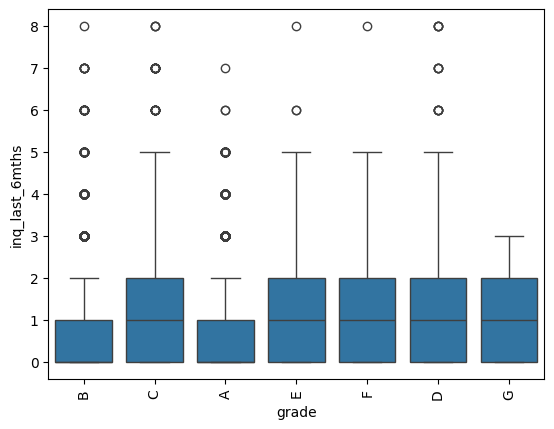

In [ ]:

num_cols_updated=["loan_amnt","int_rate","installment","annual_inc","dti","delinq_2yrs","revol_util","inq_last_6mths"]

for col1 in cat_cols_without_loan_status:
  for col2 in num_cols_updated:
    print("boxplot of ",col1," vs",col2)
    sns.boxplot(x=df7[col1],y=df7[col2])
    plt.xticks(rotation=90)
    plt.show()

In [ ]:

pvt=pd.pivot_table(data=df7, index='purpose', columns='loan_status', values='inq_last_6mths',aggfunc = [np.mean, my25, np.median, np.std, my75])
pvt
# pvt.plot.barh( stacked='True', figsize=[10,8])



loan_status         Charged Off  Fully Paid
purpose                                    
car                    1.127517    0.838903
credit_card            0.915217    0.702837
debt_consolidation     0.982612    0.785871
educational            1.440000    1.033898
home_improvement       1.407942    1.052243
house                  1.613636    1.351240
major_purchase         0.950739    0.838551
medical                1.125000    0.846473
moving                 1.034483    0.857494
other                  1.091241    0.867621
renewable_energy       0.411765    0.676923
small_business         1.168449    1.001044
vacation               0.900000    0.856643
wedding                1.144578    0.828169

##Bivariate Analysis findings

1. Borrowers who got charged off have less annual income than the borrowers who paid the loan fully.
2. Borrowers who took loan on high interest rate have higher chances of Charge off
3. It is observed that the borrowers of charged off loans have on average high loan to income ratio than the borrowers who paid the loan amount fully.
4. It is observed that the charged off borrowers have high revolving line utilization rate.
5. Borrowers who got charged off enquired more in last 6 months.
6. Loans which got disbursed on G grade has max chances of Default.
41.38% loans disbursed under G grade got charged off.
7. Loans which got disbursed on G grade and very specific to G3 subgrade has 48.38% success ratio.
That means 51.62% borrower who got loan under G3 does not pay the full amount.
8. It is observed that 26.4% borrower defaulted who took loan on 60 months term whereas only 11.69% people defaulted on 36 months loan term.
9. Loan taken related to small businesses has higher chances of charge off.
Almost 28.08% loans were charged off according to the analysis.



#Overall Insights


Borrowers
1. who have less anual income and takes loan on high interest rate
2. who have enquired more than one time in average in last 6 months
3. Who took loan for small business purpose

have higher chances of charge off.

Generally these types of loans are disbursed under "G" grade only.